## ◇株価予測◇

#### 目次  
・第1章：準備～データの可視化  
・第2章：LSTMによる分類分析（UP or Down予測）  
・第3章：線形回帰による回帰分析（How much予測）  
・番外編、メモ

#### モチベーション
・データの可視化の練習  
・時系列分析の学習  
・以前購入して塩漬けになっている株の行く末を予測したい →別ノートで実施予定

#### 参照
・キノコード：【完全版】この1本でPythonで「株価データ取得、分析、可視化、機械学習で予測」までを一挙説明！【プログラミングで株価分析】  
https://www.youtube.com/watch?v=6R6-BCFd7zM

## 

## ＜第１章＞
## 1. 準備

・今回はpandasのDataReaderを使って、主に日経平均株価の取得を行い、株価分析を実施してみることとする  

・ta-libのインストールは下記URLを参考にしてなんとかクリア  
https://optrip.xyz/?p=2242

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import japanize_matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import mplfinance as mpf
import yfinance as yf
import talib as ta
import plotly.graph_objects as go
from pandas_datareader import data
from plotly.subplots import make_subplots
from datetime import datetime, timedelta

In [5]:
#ワーニングを非表示にする設定
import warnings
warnings.simplefilter('ignore')

In [6]:
#最大表示行数の指定
pd.set_option('display.max_rows', 10)

▼ ta-libをインストールするためにpythonのversionとbitを確認


In [ ]:
import sys

#sys.maxsizeは通常、32ビットでは 2**31 - 1、64ビットでは 2**63 - 1 になります
is64Bit = sys.maxsize > 2 ** 32
if is64Bit:
    print("64bit")
else:
    print("32bit")

64bit


In [91]:
conda info


     active environment : base
    active env location : C:\Users\kokam\anaconda3
            shell level : 1
       user config file : C:\Users\kokam\.condarc
 populated config files : C:\Users\kokam\.condarc
          conda version : 22.9.0
    conda-build version : 3.21.8
         python version : 3.9.12.final.0
       virtual packages : __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\kokam\anaconda3  (writable)
      conda av data dir : C:\Users\kokam\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package cache : C:\Users\

In [84]:
#以下ファイルをこのノートブックのファイルまで移動させてから実行
pip install TA_Lib-0.4.24-cp39-cp39-win_amd64.whl

Processing c:\users\kokam\desktop\学習\株価予測\ta_lib-0.4.24-cp39-cp39-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


## 2. データの読み込みから可視化までの一連の流れ

・日経平均株価の時系列データより、株価チャートを表示させてみる

In [50]:
from pandas_datareader import data

start = "2018-09-01"
end = "2022-09-01"

df = data.DataReader("^N225", "yahoo", start, end)
date= df.index

df.head()

High           Low          Open         Close  \
Date                                                                 
2018-09-03  22820.480469  22684.429688  22819.169922  22707.380859   
2018-09-04  22753.179688  22612.150391  22740.050781  22696.900391   
2018-09-05  22692.250000  22570.519531  22663.800781  22580.830078   
2018-09-06  22535.339844  22416.630859  22458.970703  22487.939453   
2018-09-07  22372.890625  22172.900391  22351.839844  22307.060547   

                Volume     Adj Close  
Date                                  
2018-09-03  49900000.0  22707.380859  
2018-09-04  52300000.0  22696.900391  
2018-09-05  65400000.0  22580.830078  
2018-09-06  62200000.0  22487.939453  
2018-09-07  69800000.0  22307.060547

In [5]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [6]:
df.index

DatetimeIndex(['2018-09-03', '2018-09-04', '2018-09-05', '2018-09-06',
               '2018-09-07', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14',
               ...
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01'],
              dtype='datetime64[ns]', name='Date', length=971, freq=None)

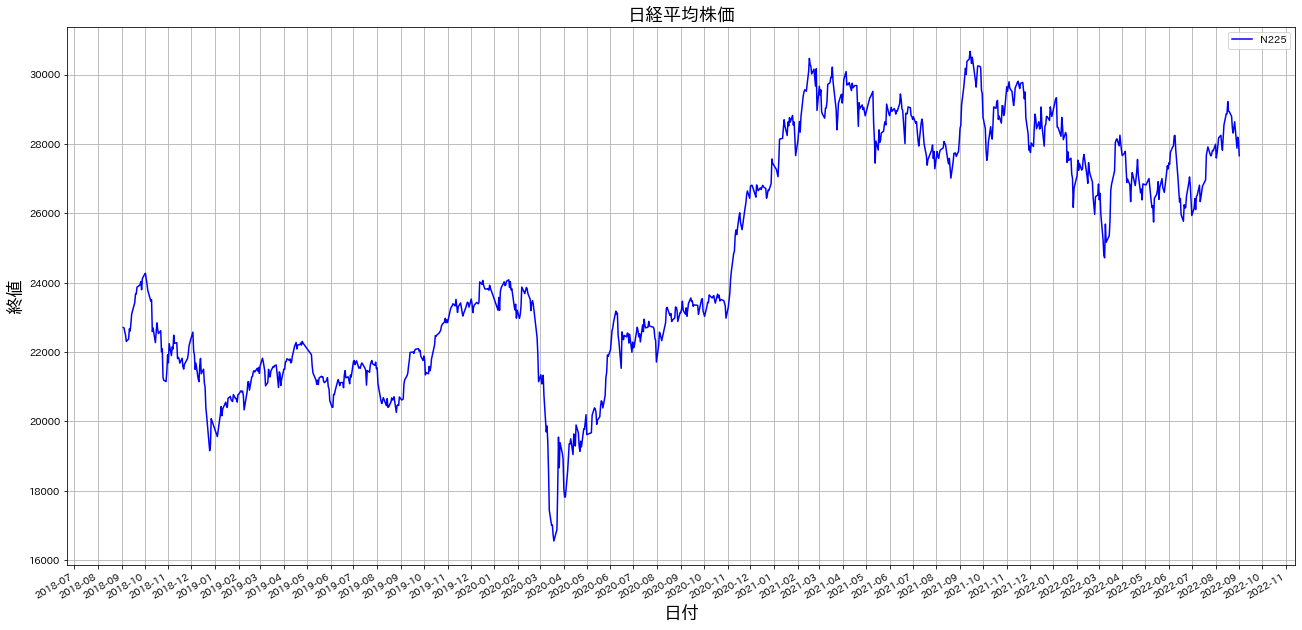

In [10]:
#終値の動きをすべて可視化
plt.figure(figsize=(22,11))
plt.title('日経平均株価', fontsize = 18)
plt.xlabel('日付', fontsize = 18)
plt.ylabel('終値', fontsize = 18)
plt.plot(date, df['Adj Close'], label = 'N225', color="blue")
plt.legend()
plt.grid()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.show()

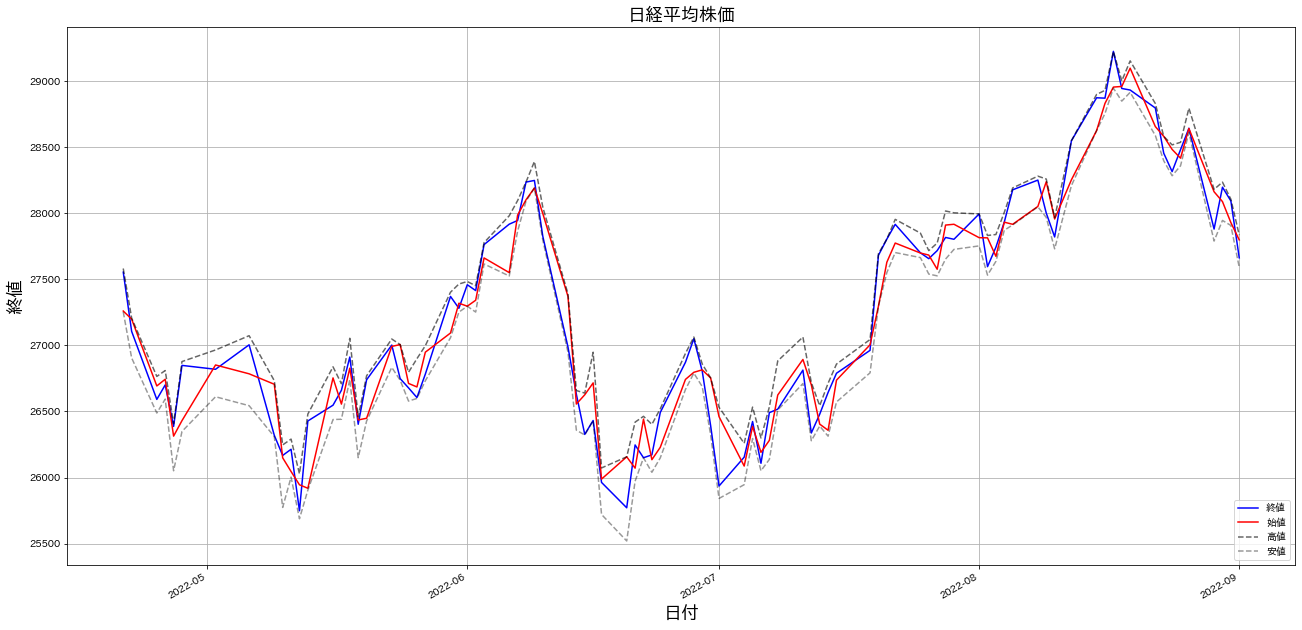

In [11]:
#直近90日間における4つの値動きを可視化
plt.figure(figsize=(22,11))
plt.title('日経平均株価', fontsize = 18)
plt.xlabel('日付', fontsize = 18)
plt.ylabel('終値', fontsize = 18)
plt.plot(date[-90:], df['Adj Close'][-90:], label = '終値', color="blue")
plt.plot(date[-90:], df['Open'][-90:], label = '始値', color="red", )
plt.plot(date[-90:], df['High'][-90:], label = '高値', color="black", linestyle= "--", alpha=0.6)
plt.plot(date[-90:], df['Low'][-90:], label = '安値', color="black", linestyle= "--", alpha=0.4)
plt.grid()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.legend(loc = 'lower right')
plt.show()

In [12]:
#単純移動平均を追加
df["5日間移動平均"]=df["Adj Close"].rolling(5).mean().round(1)
df["25日間移動平均"]=df["Adj Close"].rolling(25).mean().round(1)
df["50日間移動平均"]=df["Adj Close"].rolling(50).mean().round(1)

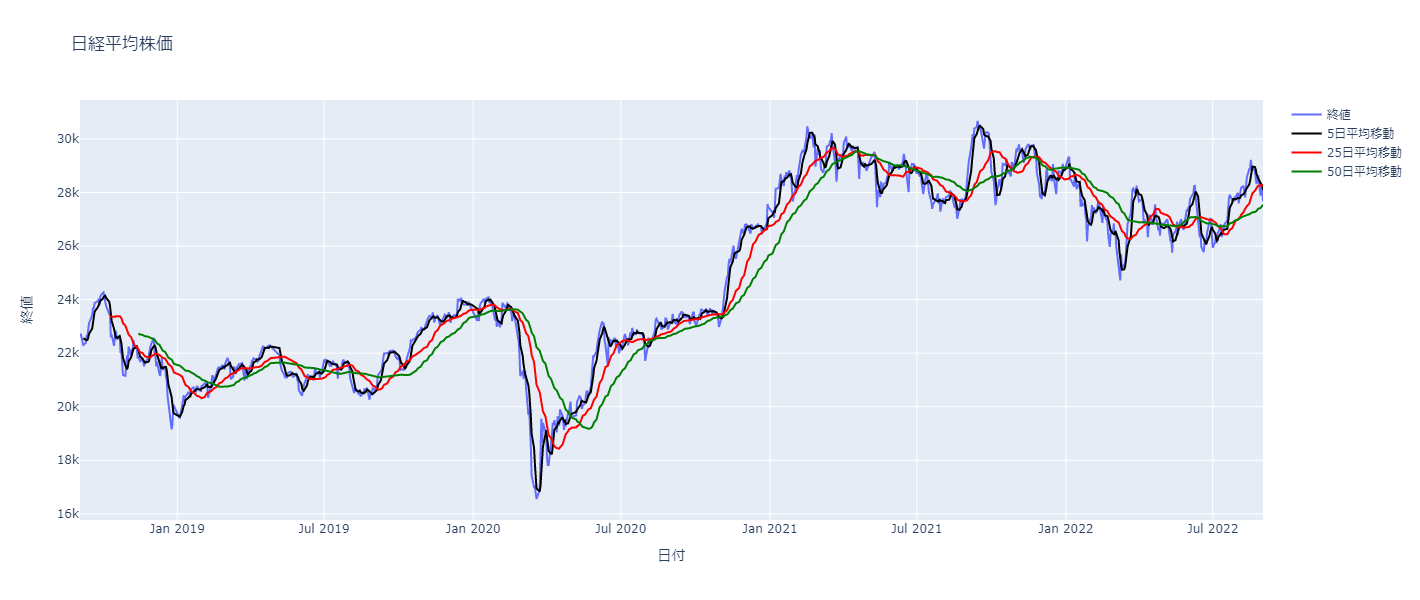

In [14]:
#plotlyで可視化

#Figureオブジェクト作成
fig = go.Figure()

#traceをFigureに追加
fig.add_trace(go.Scatter(x=date, y=df['Adj Close'], name="終値"))
fig.add_trace(go.Scatter(x=date, y=df["5日間移動平均"], name="5日平均移動", line=dict(color="black")))
fig.add_trace(go.Scatter(x=date, y=df["25日間移動平均"], name="25日平均移動", line=dict(color="red")))
fig.add_trace(go.Scatter(x=date, y=df["50日間移動平均"], name="50日平均移動", line=dict(color="green")))

#レイアウトの設定
fig.update_layout(title='日経平均株価', width=1000, height=600)
 
#軸の設定
fig.update_xaxes(title='日付')
fig.update_yaxes(title='終値')

fig.show()

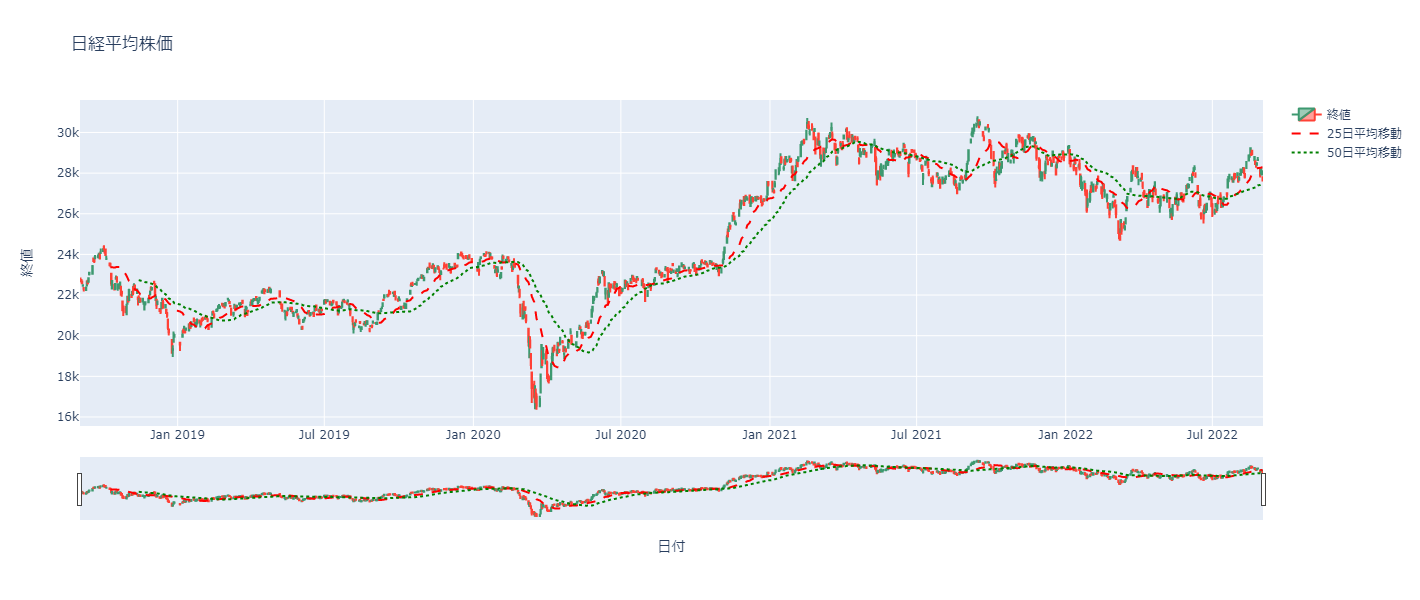

In [15]:
#plotlyで可視化（ローソク足）

#Figureオブジェクト作成
fig = go.Figure(data=[go.Candlestick(x=date, open=df['Open'], high=df['High'], low=df['Low'], close=df['Adj Close'], name="終値")])
fig.add_trace(go.Scatter(x=date, y=df["25日間移動平均"], name="25日平均移動", line=dict(color="red", dash="dash")))
fig.add_trace(go.Scatter(x=date, y=df["50日間移動平均"], name="50日平均移動", line=dict(color="green", dash="dot",)))

#レイアウトの設定
fig.update_layout(title='日経平均株価', width=1000, height=600)
 
#軸の設定
fig.update_xaxes(title='日付')
fig.update_yaxes(title='終値')

fig.show()

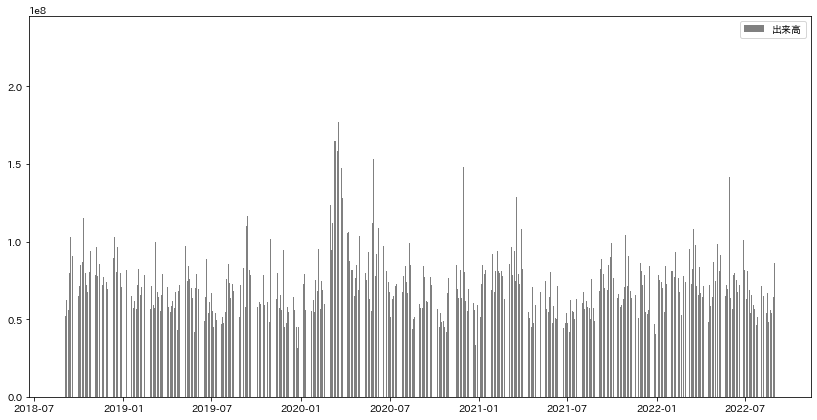

In [16]:
#出来高のグラフを追加
plt.figure(figsize=(14,7))
plt.bar(date,df["Volume"], label="出来高", color="gray")
plt.legend()

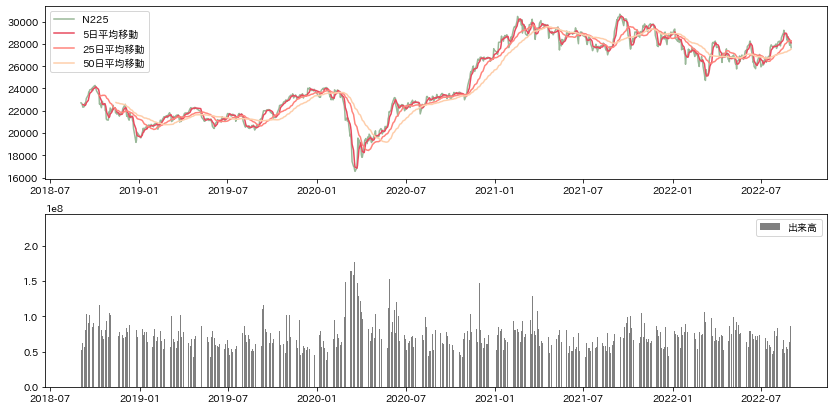

In [334]:
#株価推移と出来高推移を同時に表示

plt.figure(figsize=(14,7))
plt.subplot(2,1,1)

plt.plot(date, df['Adj Close'], label = 'N225', color="#99b898")
plt.plot(date, df["5日間移動平均"], label="5日平均移動", color="#e84a5f")
plt.plot(date, df["25日間移動平均"], label="25日平均移動", color="#ff847c")
plt.plot(date, df["50日間移動平均"], label="50日平均移動", color="#feceab")
plt.legend()

plt.subplot(2,1,2)
plt.bar(date,df["Volume"], label="出来高", color="gray")
plt.legend()

## 3. いくつかの指標を追加したテクニカル分析  
・MACD：トレンドを見る指標　　0以上なら上昇トレンド、0以下なら加工トレンド  
・RSI：売られ過ぎ」「買われ過ぎ」を判断する指標　　20～30%を下回ると「売られ過ぎ」、70～80%を上回ると買われ過ぎ  
・ボリンジャーバンド：RSI同様　　プラスマイナス標準偏差の2倍の範囲を用いて判断  
・ローソク足：始値、高値、安値、終値、という四本値を形で表したもの

In [17]:
from pandas_datareader import data

start = '2018-09-01'
end = '2022-09-01'

df = data.DataReader("^N225", "yahoo", start, end)
date= df.index

#単純移動平均を追加
df["5日間移動平均"]=df["Adj Close"].rolling(5).mean().round(1)
df["25日間移動平均"]=df["Adj Close"].rolling(25).mean().round(1)
df["50日間移動平均"]=df["Adj Close"].rolling(50).mean().round(1)

df.head()

High           Low          Open         Close  \
Date                                                                 
2018-09-03  22820.480469  22684.429688  22819.169922  22707.380859   
2018-09-04  22753.179688  22612.150391  22740.050781  22696.900391   
2018-09-05  22692.250000  22570.519531  22663.800781  22580.830078   
2018-09-06  22535.339844  22416.630859  22458.970703  22487.939453   
2018-09-07  22372.890625  22172.900391  22351.839844  22307.060547   

                Volume     Adj Close  5日間移動平均  25日間移動平均  50日間移動平均  
Date                                                               
2018-09-03  49900000.0  22707.380859      NaN       NaN       NaN  
2018-09-04  52300000.0  22696.900391      NaN       NaN       NaN  
2018-09-05  65400000.0  22580.830078      NaN       NaN       NaN  
2018-09-06  62200000.0  22487.939453      NaN       NaN       NaN  
2018-09-07  69800000.0  22307.060547  22556.0       NaN       NaN

▼ MACD

In [18]:
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df

High           Low          Open         Close  \
Date                                                                 
2018-09-03  22820.480469  22684.429688  22819.169922  22707.380859   
2018-09-04  22753.179688  22612.150391  22740.050781  22696.900391   
2018-09-05  22692.250000  22570.519531  22663.800781  22580.830078   
2018-09-06  22535.339844  22416.630859  22458.970703  22487.939453   
2018-09-07  22372.890625  22172.900391  22351.839844  22307.060547   
...                  ...           ...           ...           ...   
2022-08-26  28792.929688  28608.699219  28639.470703  28641.380859   
2022-08-29  28179.089844  27788.119141  28161.060547  27878.960938   
2022-08-30  28233.800781  27944.250000  28086.720703  28195.580078   
2022-08-31  28104.800781  27906.169922  27928.089844  28091.529297   
2022-09-01  27832.779297  27589.699219  27797.000000  27661.470703   

                Volume     Adj Close  5日間移動平均  25日間移動平均  50日間移動平均        macd  \
Date                                                                            
2018-09-03  49900000.0  22707.380859      NaN       NaN       NaN         NaN   
2018-09-04  52300000.0  22696.900391      NaN       NaN       NaN         NaN   
2018-09-05  65400000.0  22580.830078      NaN       NaN       NaN         NaN   
2018-09-06  62200000.0  22487.939453      NaN       NaN       NaN         NaN   
2018-09-07  69800000.0  22307.060547  22556.0       NaN       NaN         NaN   
...                ...           ...      ...       ...       ...         ...   
2022-08-26  49100000.0  28641.380859  28536.2   28246.9   27393.0  335.474456   
2022-08-29  64100000.0  27878.960938  28353.1   28245.5   27421.9  258.883127   
2022-08-30  60700000.0  28195.580078  28301.7   28265.3   27466.6  221.182807   
2022-08-31  86200000.0  28091.529297  28257.3   28282.8   27513.0  180.824571   
2022-09-01  68900000.0  27661.470703  28093.8   28280.6   27541.3  112.837523   

            macdsignal    macdhist  
Date                                
2018-09-03         NaN         NaN  
2018-09-04         NaN         NaN  
2018-09-05         NaN         NaN  
2018-09-06         NaN         NaN  
2018-09-07         NaN         NaN  
...                ...         ...  
2022-08-26  391.953750  -56.479295  
2022-08-29  365.339626 -106.456499  
2022-08-30  336.508262 -115.325455  
2022-08-31  305.371524 -124.546953  
2022-09-01  266.864724 -154.027201  

[971 rows x 12 columns]

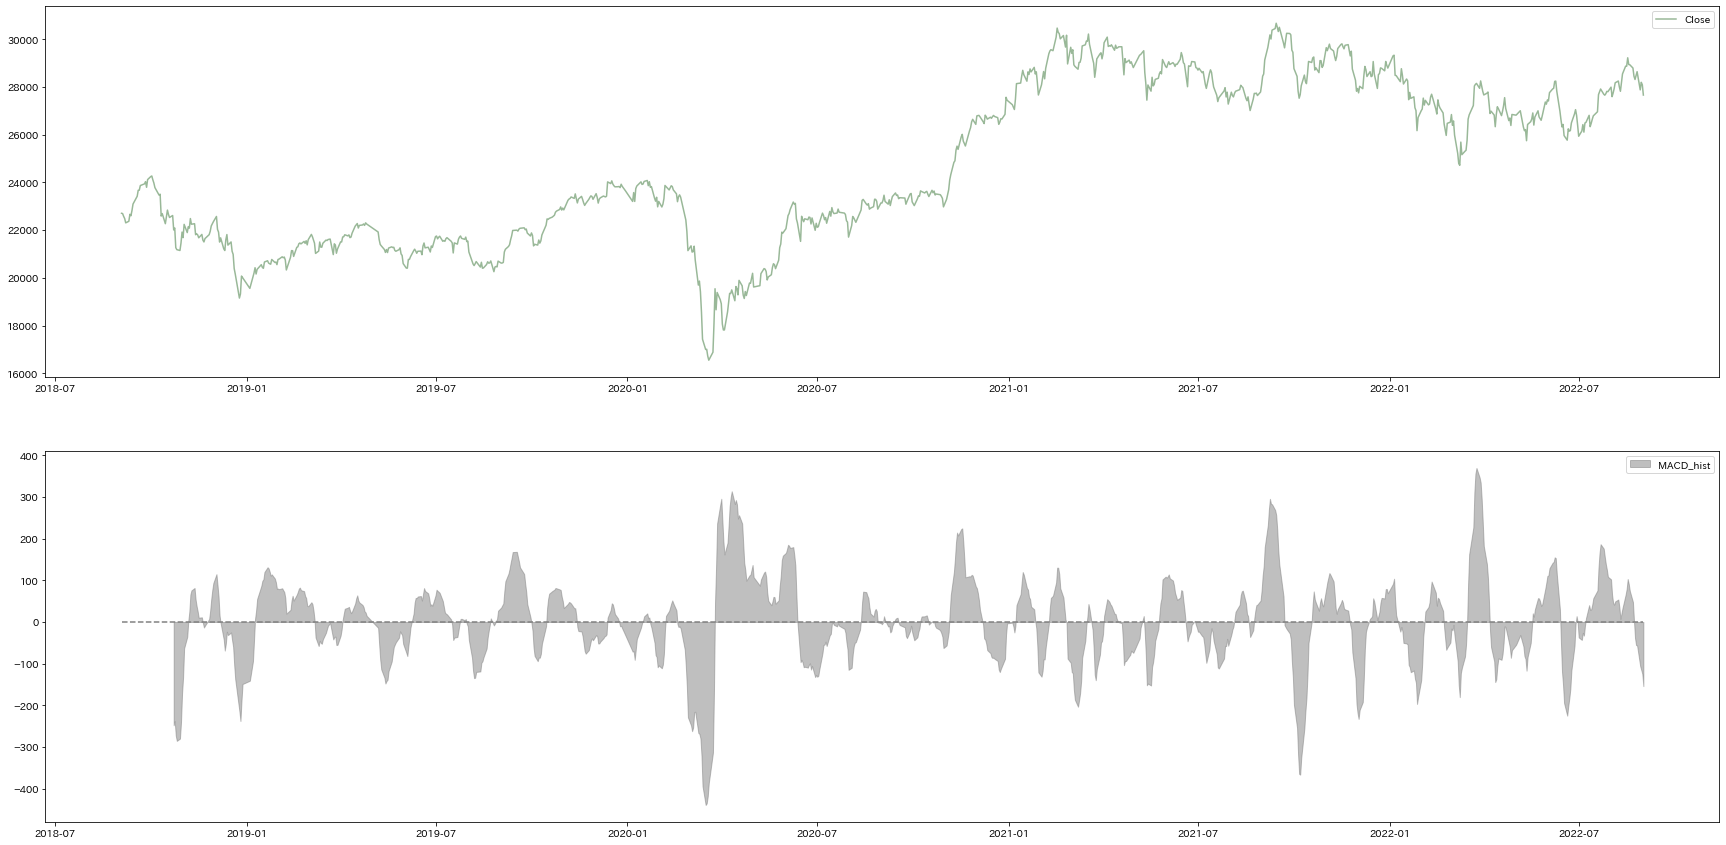

In [19]:
#可視化
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date, df['Adj Close'], label= 'Close', color="#99b898")
plt.legend()

plt.subplot(2,1,2)
plt.fill_between(date, df['macdhist'], color= 'gray', alpha= 0.5, label= "MACD_hist")
plt.hlines(0, df.index.min(), df.index.max(), 'gray', linestyles="dashed")
plt.legend()

savename = 'MACD.png'
plt.savefig(savename, dpi=300)

▼ RSI

In [20]:
#25日のRSIを計算
df['RSI'] = ta.RSI(df['Adj Close'], timeperiod=25)
df.tail()

High           Low          Open         Close  \
Date                                                                 
2022-08-26  28792.929688  28608.699219  28639.470703  28641.380859   
2022-08-29  28179.089844  27788.119141  28161.060547  27878.960938   
2022-08-30  28233.800781  27944.250000  28086.720703  28195.580078   
2022-08-31  28104.800781  27906.169922  27928.089844  28091.529297   
2022-09-01  27832.779297  27589.699219  27797.000000  27661.470703   

                Volume     Adj Close  5日間移動平均  25日間移動平均  50日間移動平均        macd  \
Date                                                                            
2022-08-26  49100000.0  28641.380859  28536.2   28246.9   27393.0  335.474456   
2022-08-29  64100000.0  27878.960938  28353.1   28245.5   27421.9  258.883127   
2022-08-30  60700000.0  28195.580078  28301.7   28265.3   27466.6  221.182807   
2022-08-31  86200000.0  28091.529297  28257.3   28282.8   27513.0  180.824571   
2022-09-01  68900000.0  27661.470703  28093.8   28280.6   27541.3  112.837523   

            macdsignal    macdhist        RSI  
Date                                           
2022-08-26  391.953750  -56.479295  57.737680  
2022-08-29  365.339626 -106.456499  50.698203  
2022-08-30  336.508262 -115.325455  53.168185  
2022-08-31  305.371524 -124.546953  52.271717  
2022-09-01  266.864724 -154.027201  48.733978

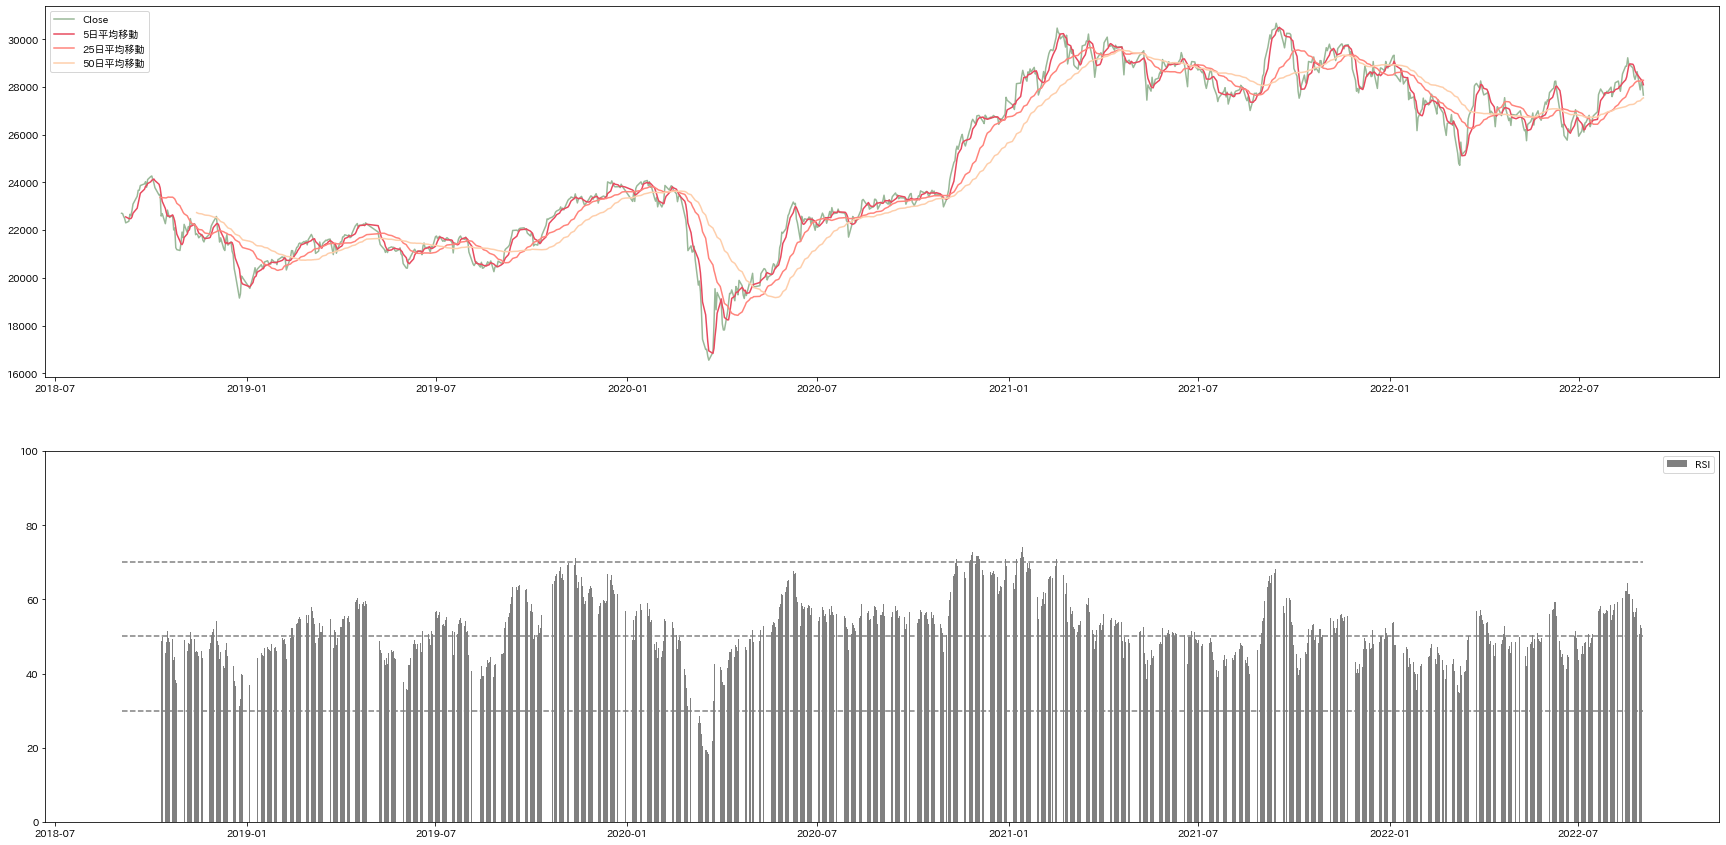

In [21]:
#可視化
plt.figure(figsize=(30,15))

plt.subplot(2,1,1)
plt.plot(date, df['Adj Close'], label = 'Close', color="#99b898")
plt.plot(date, df["5日間移動平均"], label="5日平均移動", color="#e84a5f")
plt.plot(date, df["25日間移動平均"], label="25日平均移動", color="#ff847c")
plt.plot(date, df["50日間移動平均"], label="50日平均移動", color="#feceab")
plt.legend()

plt.subplot(2,1,2)
plt.bar(date, df["RSI"], label="RSI", color="gray")
plt.ylim(0,100)
plt.hlines([30,50,70], df.index.min(), df.index.max(), "gray", linestyles="dashed")
plt.legend()

savename = 'RSI.png'
plt.savefig(savename, dpi=300)

▼ ボリンジャーバンド

In [22]:
df['upper'], df['middle'], df['lower'] = ta.BBANDS(df['Adj Close'], timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)
df.tail()

High           Low          Open         Close  \
Date                                                                 
2022-08-26  28792.929688  28608.699219  28639.470703  28641.380859   
2022-08-29  28179.089844  27788.119141  28161.060547  27878.960938   
2022-08-30  28233.800781  27944.250000  28086.720703  28195.580078   
2022-08-31  28104.800781  27906.169922  27928.089844  28091.529297   
2022-09-01  27832.779297  27589.699219  27797.000000  27661.470703   

                Volume     Adj Close  5日間移動平均  25日間移動平均  50日間移動平均        macd  \
Date                                                                            
2022-08-26  49100000.0  28641.380859  28536.2   28246.9   27393.0  335.474456   
2022-08-29  64100000.0  27878.960938  28353.1   28245.5   27421.9  258.883127   
2022-08-30  60700000.0  28195.580078  28301.7   28265.3   27466.6  221.182807   
2022-08-31  86200000.0  28091.529297  28257.3   28282.8   27513.0  180.824571   
2022-09-01  68900000.0  27661.470703  28093.8   28280.6   27541.3  112.837523   

            macdsignal    macdhist        RSI         upper        middle  \
Date                                                                        
2022-08-26  391.953750  -56.479295  57.737680  29214.023767  28246.903750   
2022-08-29  365.339626 -106.456499  50.698203  29214.657058  28245.475781   
2022-08-30  336.508262 -115.325455  53.168185  29208.936988  28265.328984   
2022-08-31  305.371524 -124.546953  52.271717  29196.264965  28282.781719   
2022-09-01  266.864724 -154.027201  48.733978  29199.715095  28280.610547   

                   lower  
Date                      
2022-08-26  27279.783733  
2022-08-29  27276.294504  
2022-08-30  27321.720980  
2022-08-31  27369.298472  
2022-09-01  27361.505998

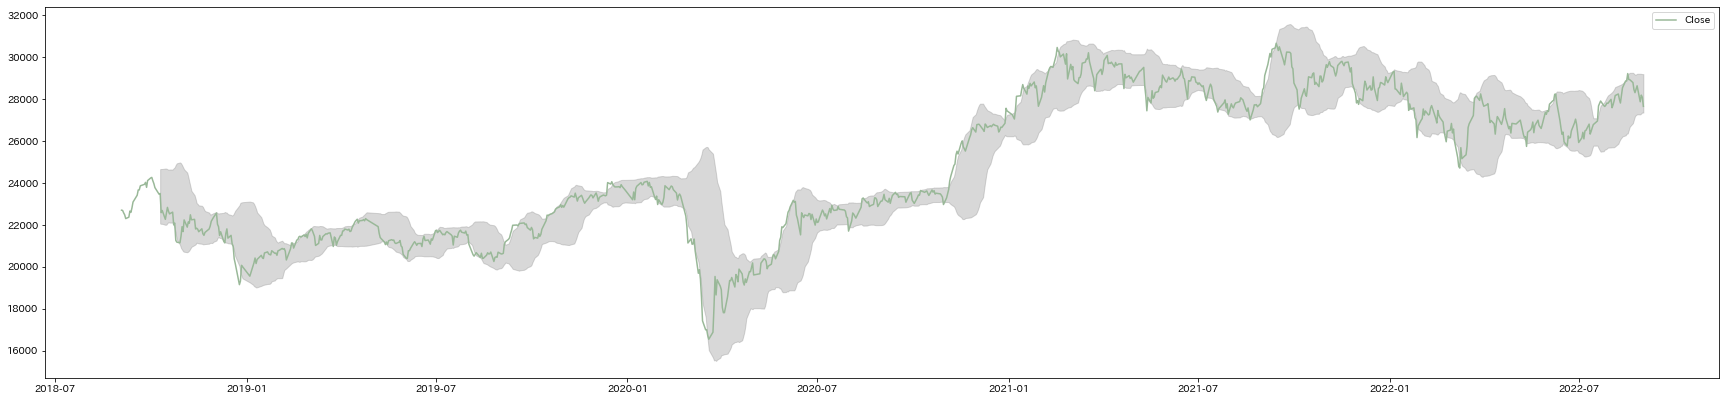

In [23]:
#可視化
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date, df['Adj Close'], label = 'Close', color="#99b898")
plt.fill_between(date, df['upper'], df['lower'], color= 'gray', alpha= 0.3)
plt.legend()

savename = 'BBANDS.png'
plt.savefig(savename, dpi=300)

▼ すべての指標を表示

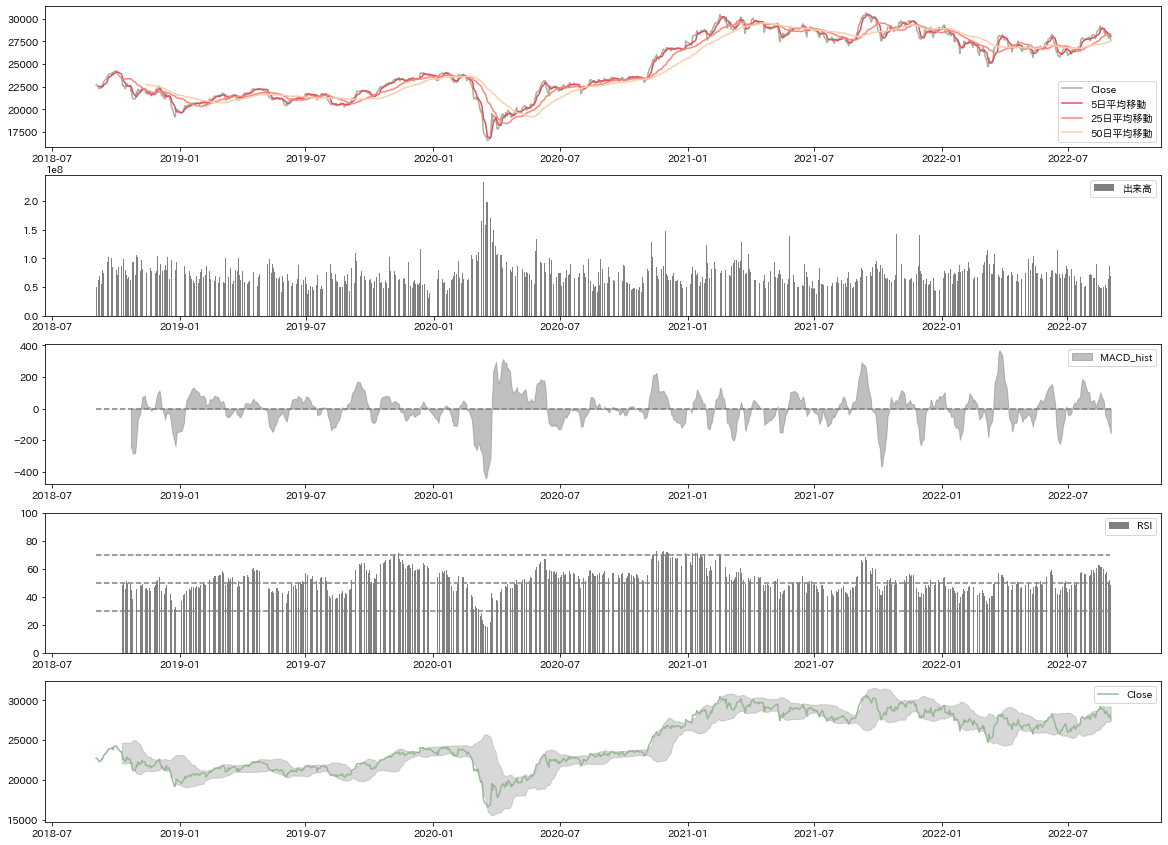

In [29]:
#可視化
plt.figure(figsize=(20,15))

#移動平均
plt.subplot(5,1,1)
plt.plot(date, df['Adj Close'], label= 'Close', color="#99b898")
plt.plot(date, df["5日間移動平均"], label="5日平均移動", color="#e84a5f")
plt.plot(date, df["25日間移動平均"], label="25日平均移動", color="#ff847c")
plt.plot(date, df["50日間移動平均"], label="50日平均移動", color="#feceab")
plt.legend()

#出来高
plt.subplot(5,1,2)
plt.bar(date,df["Volume"], label="出来高", color="gray")
plt.legend()

#MACD
plt.subplot(5,1,3)
plt.fill_between(date, df['macdhist'], color= 'gray', alpha= 0.5, label= "MACD_hist")
plt.hlines(0, df.index.min(), df.index.max(), 'gray', linestyles="dashed")
plt.legend()

#RSI
plt.subplot(5,1,4)
plt.bar(date, df["RSI"], label="RSI", color="gray")
plt.ylim(0,100)
plt.hlines([30,50,70],  df.index.min(), df.index.max(), "gray", linestyles="dashed")
plt.legend()

#ボリンジャーバンド
plt.subplot(5,1,5)
plt.plot(date, df['Adj Close'], label = 'Close', color="#99b898")
plt.fill_between(date, df['upper'], df['lower'], color= 'gray', alpha= 0.3)
plt.legend()

▼ ローソク足

In [41]:
df_candle = df[['High','Low','Open','Close','Volume']]

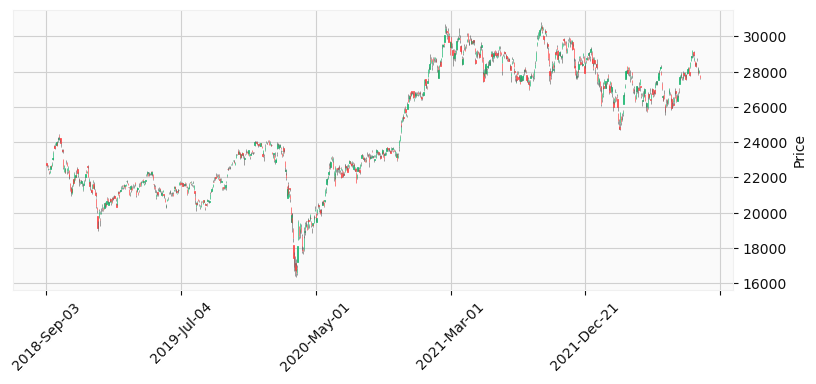

In [42]:
mpf.plot(df_candle, type='candle', style='yahoo', figsize=(10,4))

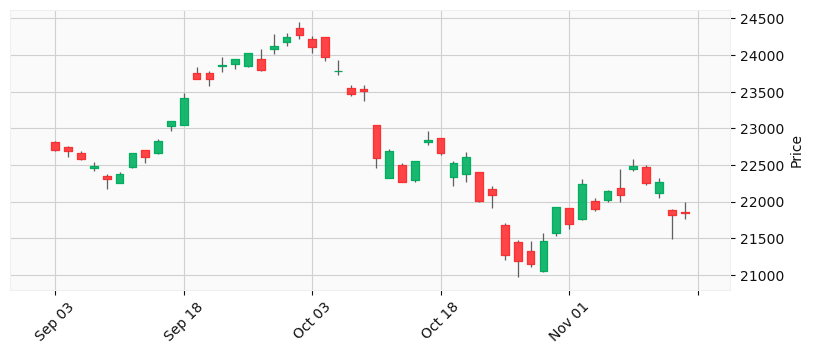

In [43]:
mpf.plot(df_candle[0:50], type='candle', style='yahoo', figsize=(10,4))

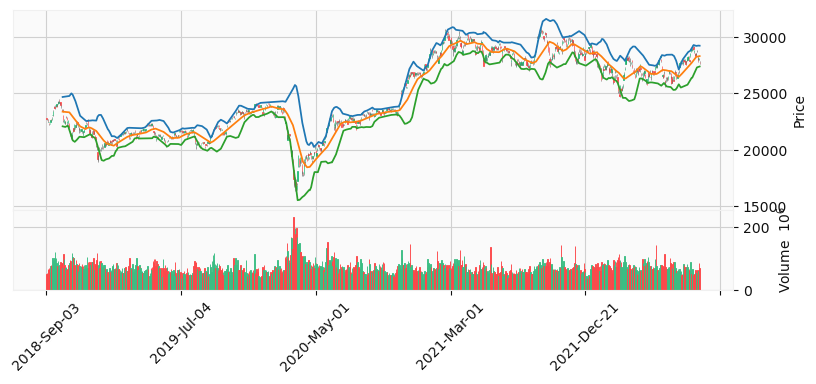

In [44]:
tcdf = df[['upper', 'middle', 'lower']]
apd = mpf.make_addplot(tcdf)

mpf.plot(df_candle, addplot=apd, type='candle', volume=True, style='yahoo', figsize=(10,4))

## （参考：ファイナンスに特化したライブラリーの使い方）
・mplfinanceを使って、複数のテクニカル指標を1つのグラフに落とし込む

In [52]:
from pandas_datareader import data

#期間が長いとうまく表示されなかった
start = "2022-01-01"
end = "2022-09-01"

df = data.DataReader("^N225", "yahoo", start, end)
date= df.index

High           Low          Open         Close    Volume  \
Date                                                                           
2022-01-04  29323.789062  28954.560547  29098.410156  29301.789062  66000000   
2022-01-05  29388.160156  29204.449219  29288.800781  29332.160156  78600000   
2022-01-06  29158.949219  28487.869141  29136.750000  28487.869141  71600000   
2022-01-07  28813.089844  28293.699219  28711.529297  28478.560547  75200000   
2022-01-11  28473.470703  28089.490234  28380.900391  28222.480469  73700000   

               Adj Close  
Date                      
2022-01-04  29301.789062  
2022-01-05  29332.160156  
2022-01-06  28487.869141  
2022-01-07  28478.560547  
2022-01-11  28222.480469

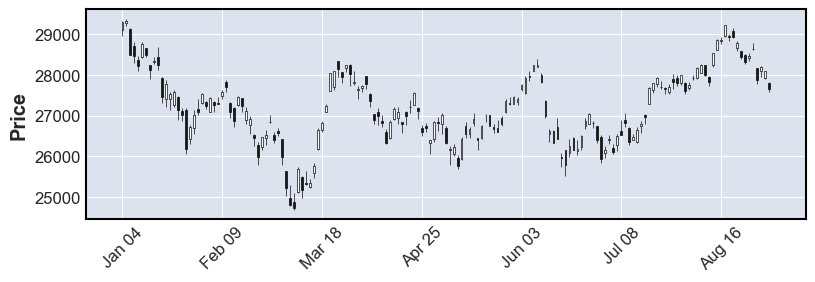

In [77]:
#ローソク足を表示
mpf.plot(df, type='candle', figsize=(10,3))

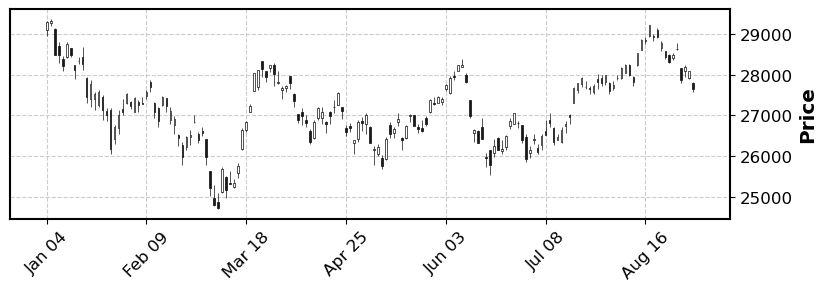

In [78]:
mpf.plot(df, type='candle', figsize=(10,3), style='classic')

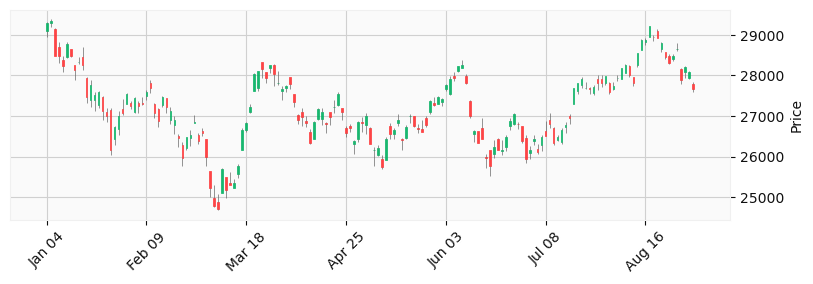

In [79]:
mpf.plot(df, type='candle', figsize=(10,3), style='yahoo')

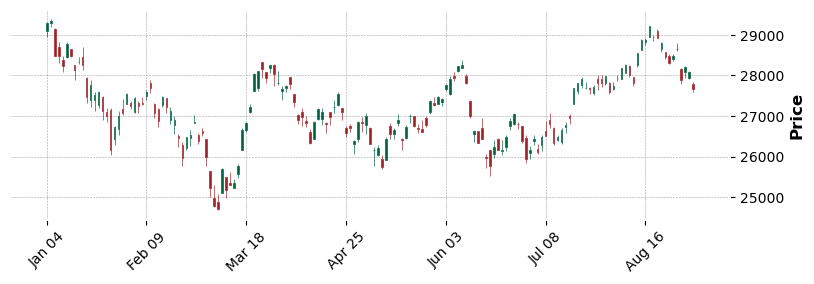

In [80]:
mpf.plot(df, type='candle', figsize=(10,3), style='charles')

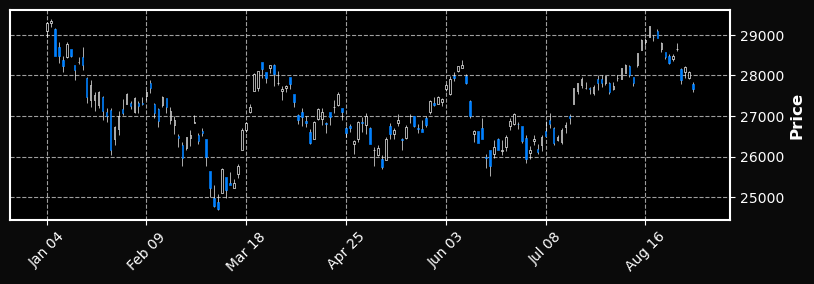

In [81]:
mpf.plot(df, type='candle', figsize=(10,3), style='mike')

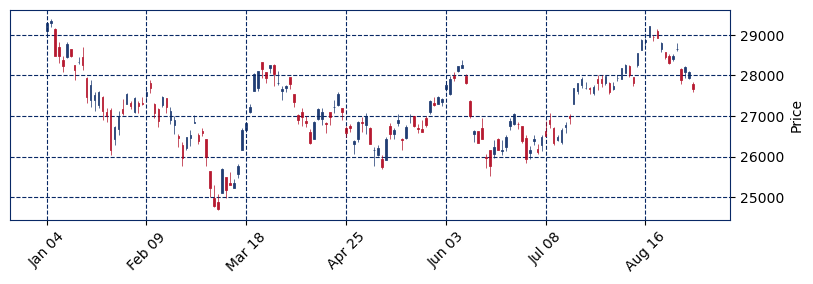

In [82]:
mpf.plot(df, type='candle', figsize=(10,3), style='starsandstripes')

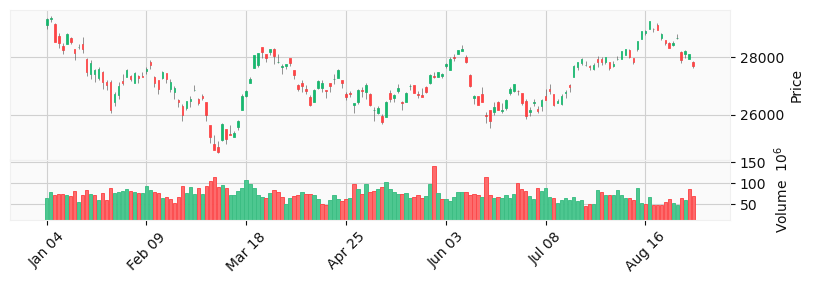

In [83]:
#出来高を追加
mpf.plot(df, type='candle', figsize=(10,3), style='yahoo', volume=True)

In [69]:
#ボリンジャーバンドを追加
df['upper'], df['middle'], df['lower'] = ta.BBANDS(df['Adj Close'], timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)
df.tail()

High           Low          Open         Close    Volume  \
Date                                                                           
2022-08-26  28792.929688  28608.699219  28639.470703  28641.380859  49100000   
2022-08-29  28179.089844  27788.119141  28161.060547  27878.960938  64100000   
2022-08-30  28233.800781  27944.250000  28086.720703  28195.580078  60700000   
2022-08-31  28104.800781  27906.169922  27928.089844  28091.529297  86200000   
2022-09-01  27832.779297  27589.699219  27797.000000  27661.470703  68900000   

               Adj Close         upper        middle         lower  
Date                                                                
2022-08-26  28641.380859  29214.023767  28246.903750  27279.783733  
2022-08-29  27878.960938  29214.657058  28245.475781  27276.294504  
2022-08-30  28195.580078  29208.936988  28265.328984  27321.720980  
2022-08-31  28091.529297  29196.264965  28282.781719  27369.298472  
2022-09-01  27661.470703  29199.715095  28280.610547  27361.505998

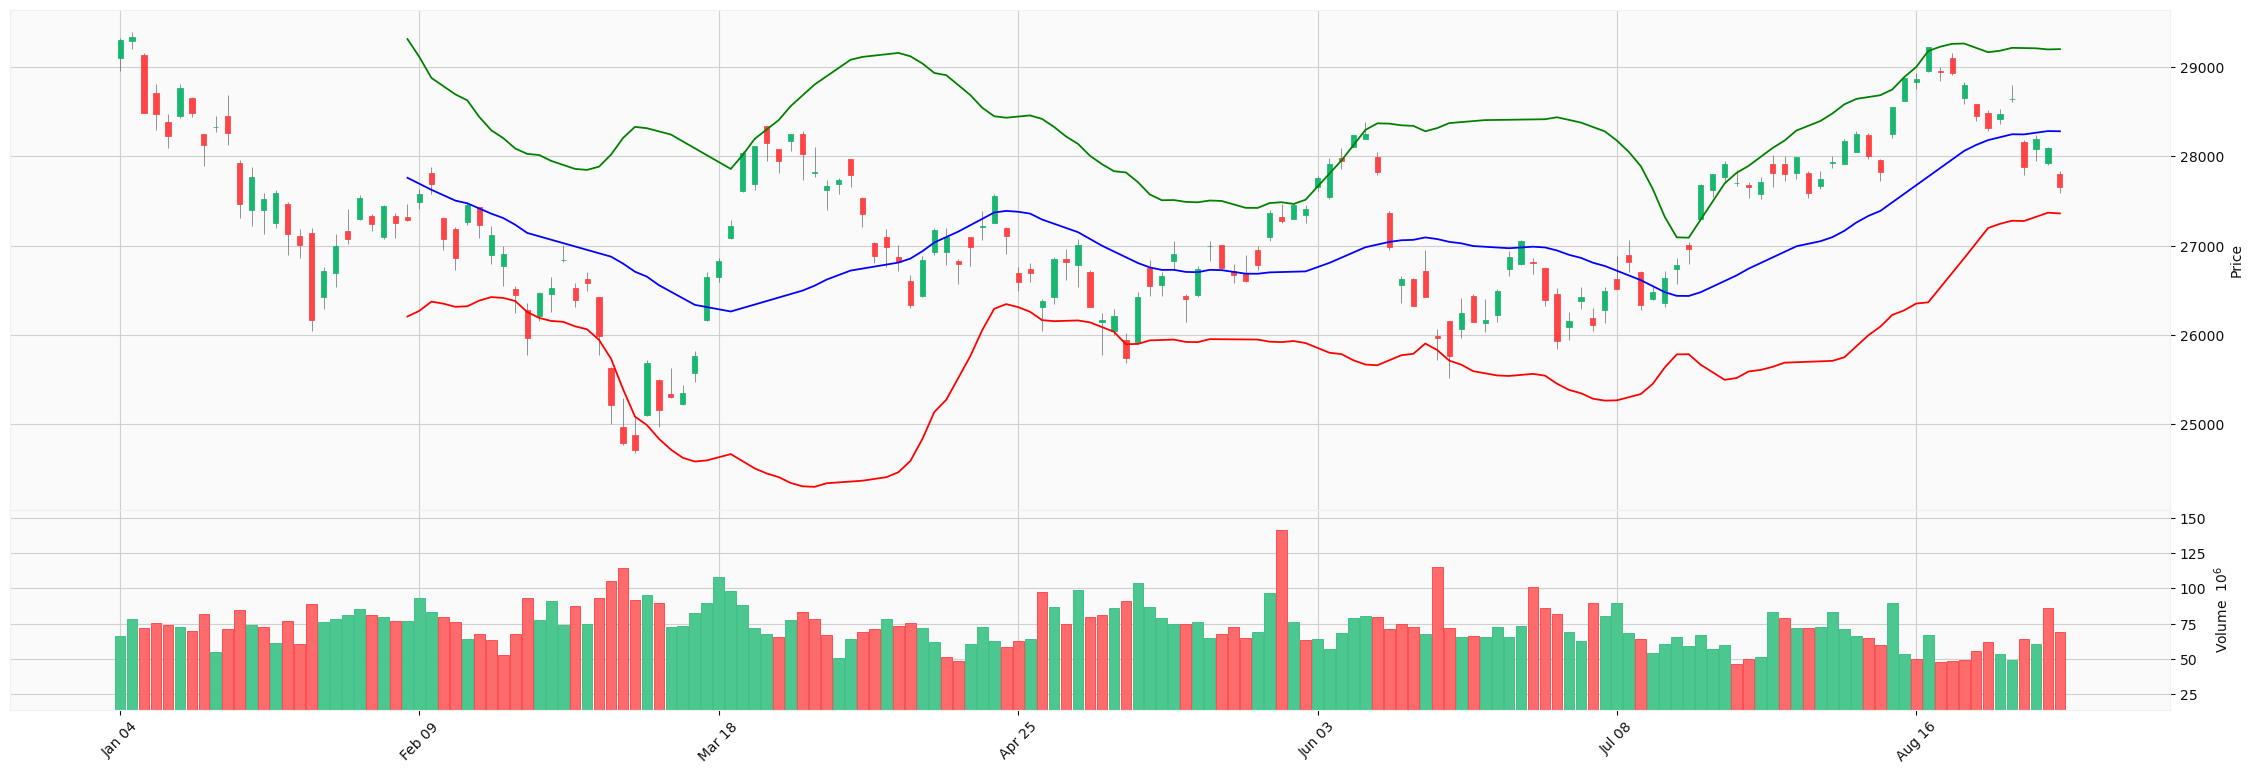

In [73]:
apds = [mpf.make_addplot(df['upper'], color="g"),
       mpf.make_addplot(df['middle'], color="b"),
       mpf.make_addplot(df['lower'], color="r"),]

mpf.plot(df, type='candle', figsize=(30,10), style='yahoo', volume=True, addplot=apds)

In [71]:
#MACDを追加
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df.tail()

High           Low          Open         Close    Volume  \
Date                                                                           
2022-08-26  28792.929688  28608.699219  28639.470703  28641.380859  49100000   
2022-08-29  28179.089844  27788.119141  28161.060547  27878.960938  64100000   
2022-08-30  28233.800781  27944.250000  28086.720703  28195.580078  60700000   
2022-08-31  28104.800781  27906.169922  27928.089844  28091.529297  86200000   
2022-09-01  27832.779297  27589.699219  27797.000000  27661.470703  68900000   

               Adj Close         upper        middle         lower  \
Date                                                                 
2022-08-26  28641.380859  29214.023767  28246.903750  27279.783733   
2022-08-29  27878.960938  29214.657058  28245.475781  27276.294504   
2022-08-30  28195.580078  29208.936988  28265.328984  27321.720980   
2022-08-31  28091.529297  29196.264965  28282.781719  27369.298472   
2022-09-01  27661.470703  29199.715095  28280.610547  27361.505998   

                  macd  macdsignal    macdhist  
Date                                            
2022-08-26  335.470484  391.947909  -56.477425  
2022-08-29  258.879449  365.334217 -106.454768  
2022-08-30  221.179402  336.503254 -115.323852  
2022-08-31  180.821418  305.366887 -124.545469  
2022-09-01  112.834603  266.860430 -154.025827

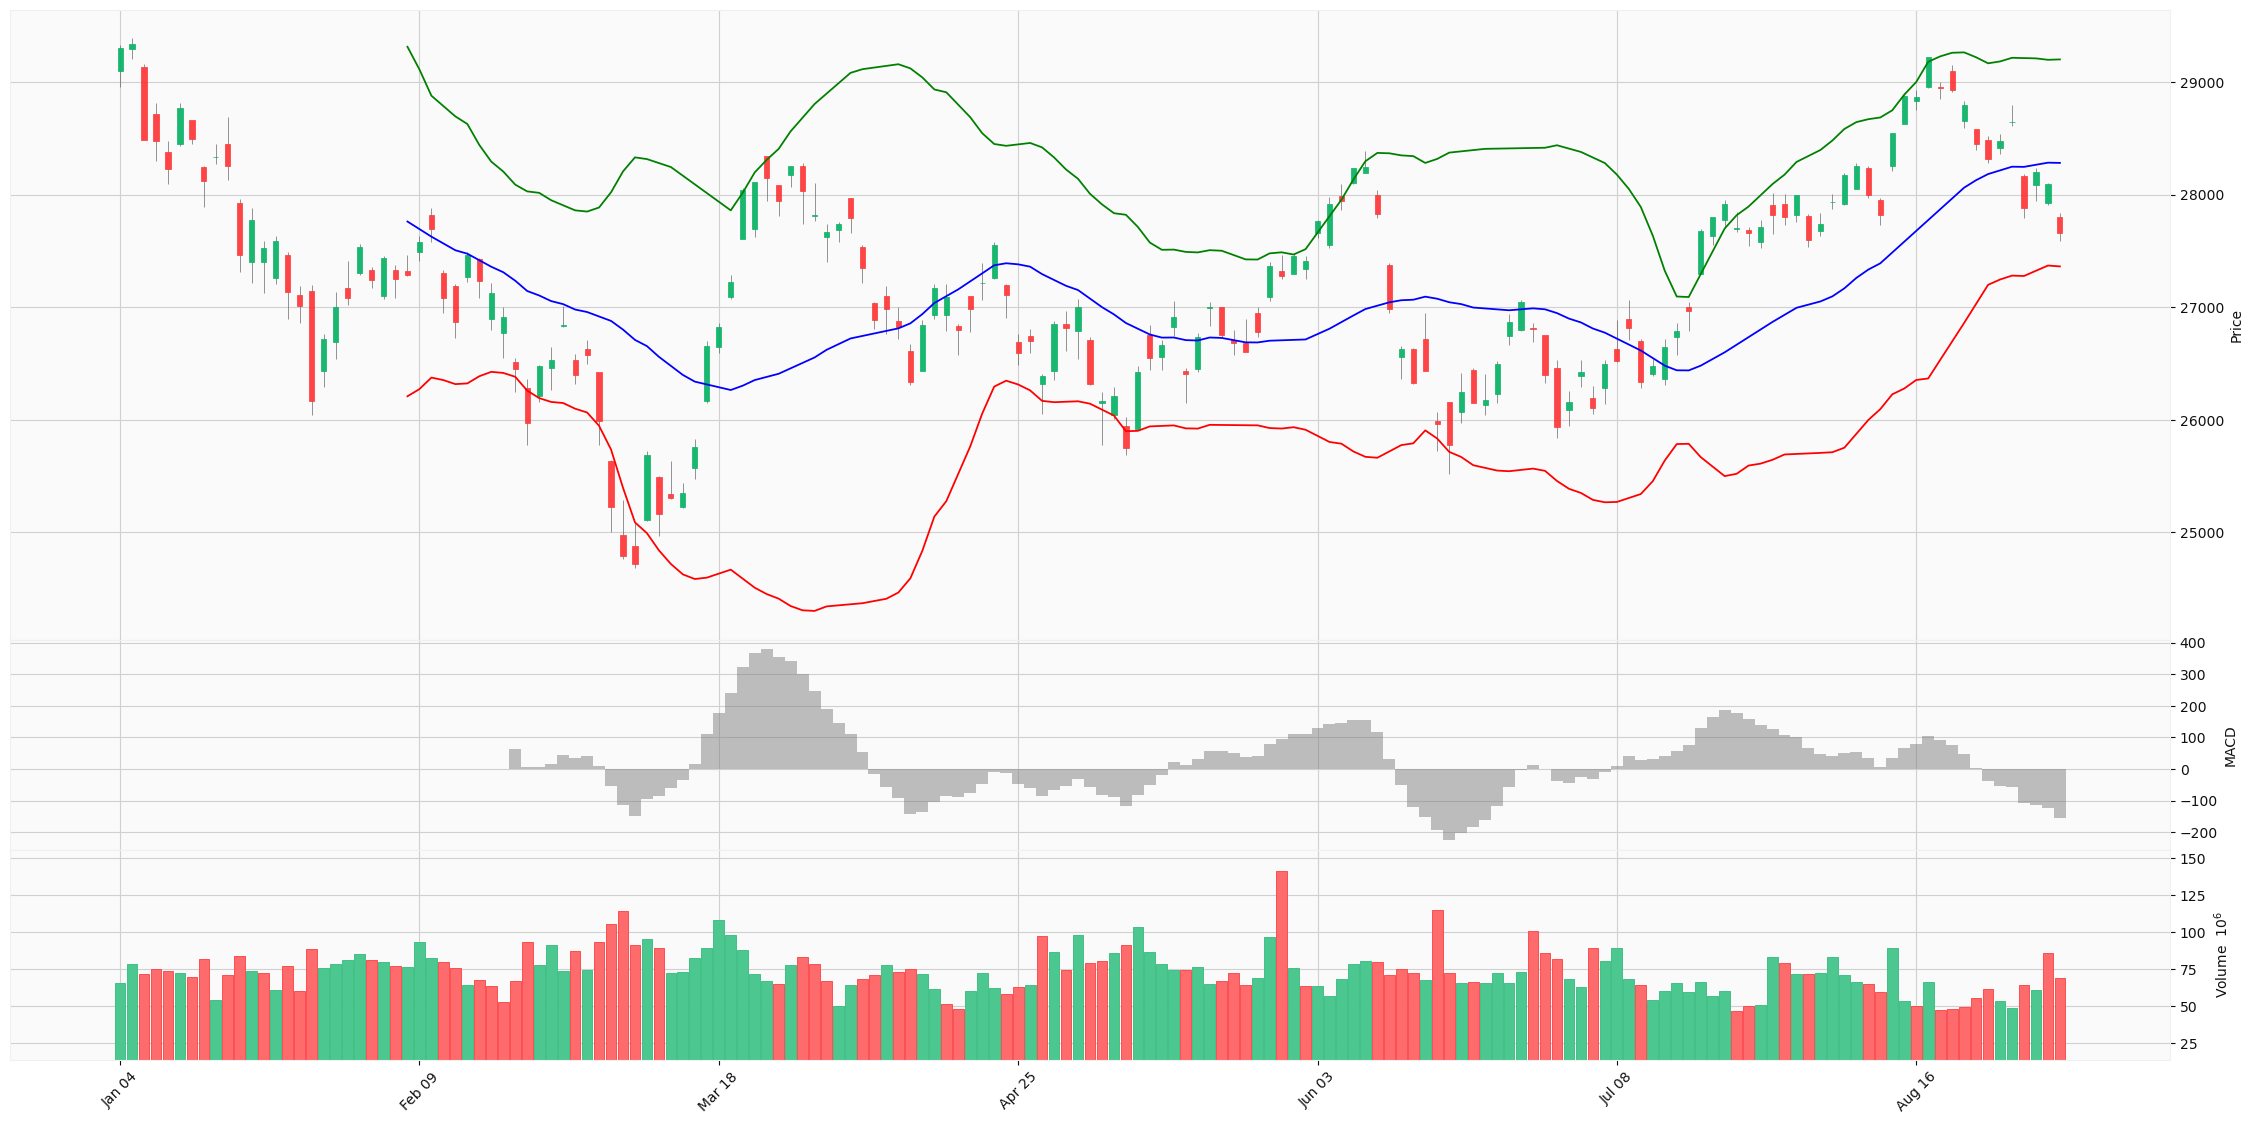

In [72]:
apds = [mpf.make_addplot(df['upper'],color='g'),  
        mpf.make_addplot(df['middle'],color='b'),
        mpf.make_addplot(df['lower'],color='r'),
        mpf.make_addplot(df['macdhist'], type='bar', 
                         width=1.0, panel=1, color='gray', alpha=0.5, ylabel='MACD')
       ]

mpf.plot(df, type='candle', figsize=(30,15), style='yahoo', volume=True, addplot=apds, 
          volume_panel=2, panel_ratios=(3,1,1))

In [74]:
#RSIを追加
df["RSI"] = ta.RSI(df["Adj Close"], timeperiod=25)
df.tail()

High           Low          Open         Close    Volume  \
Date                                                                           
2022-08-26  28792.929688  28608.699219  28639.470703  28641.380859  49100000   
2022-08-29  28179.089844  27788.119141  28161.060547  27878.960938  64100000   
2022-08-30  28233.800781  27944.250000  28086.720703  28195.580078  60700000   
2022-08-31  28104.800781  27906.169922  27928.089844  28091.529297  86200000   
2022-09-01  27832.779297  27589.699219  27797.000000  27661.470703  68900000   

               Adj Close         upper        middle         lower  \
Date                                                                 
2022-08-26  28641.380859  29214.023767  28246.903750  27279.783733   
2022-08-29  27878.960938  29214.657058  28245.475781  27276.294504   
2022-08-30  28195.580078  29208.936988  28265.328984  27321.720980   
2022-08-31  28091.529297  29196.264965  28282.781719  27369.298472   
2022-09-01  27661.470703  29199.715095  28280.610547  27361.505998   

                  macd  macdsignal    macdhist        RSI  
Date                                                       
2022-08-26  335.470484  391.947909  -56.477425  57.685642  
2022-08-29  258.879449  365.334217 -106.454768  50.654808  
2022-08-30  221.179402  336.503254 -115.323852  53.126197  
2022-08-31  180.821418  305.366887 -124.545469  52.230710  
2022-09-01  112.834603  266.860430 -154.025827  48.696753

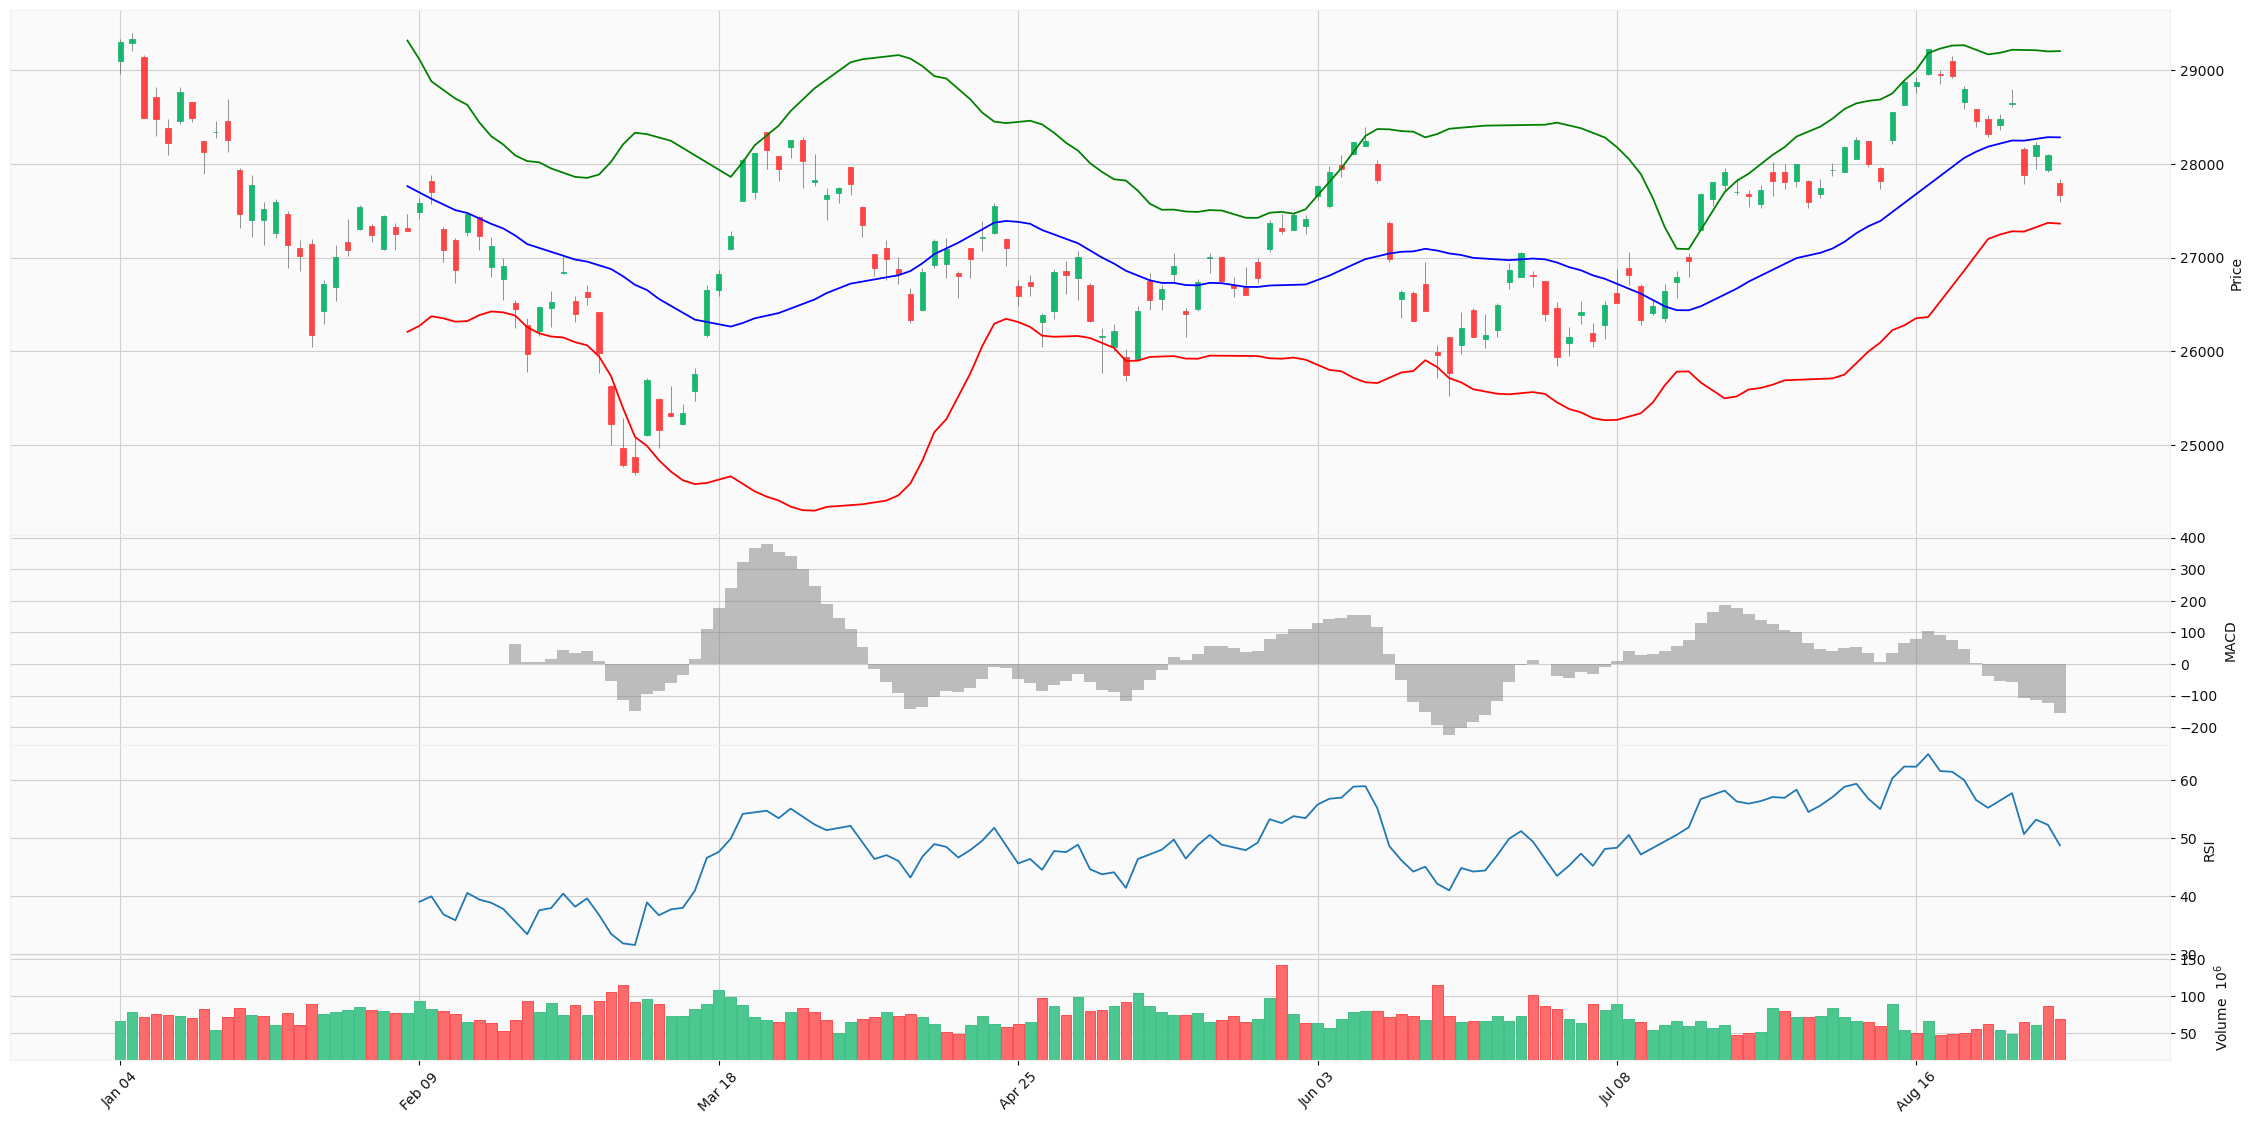

In [75]:
apds = [mpf.make_addplot(df['upper'],color='g'),  
        mpf.make_addplot(df['middle'],color='b'),
        mpf.make_addplot(df['lower'],color='r'),
        mpf.make_addplot(df['macdhist'], type='bar', 
                         width=1.0, panel=1, color='gray', alpha=0.5, ylabel='MACD'),
        mpf.make_addplot(df['RSI'], panel=2, type='line', ylabel='RSI')      
       ]

mpf.plot(df, type='candle', figsize=(30,15), style='yahoo', volume=True, addplot=apds,
       volume_panel=3, panel_ratios=(5,2,2,1))            

In [76]:
mpf.plot(df, type='candle', addplot=apds, figsize=(30,10), style='yahoo',
         volume=True, volume_panel=3,panel_ratios=(1,1,1,1), savefig='technical.png')

## 4. 一目均衡表の作成と可視化

・日本発祥のテクニカル指標：基準線、先行スパン、転換線、遅行線から構成される  
https://min-fx.jp/market/main-technicals/ichimoku/?AffiCode=95248&rdrcturl=https://min-fx.jp/market/main-technicals/ichimoku/&yclid=YSS.1001075032.EAIaIQobChMImZfi4ILI-gIVAcqWCh2MQAtZEAAYASAAEgJBO_D_BwE

In [ ]:
from pandas_datareader import data

start = "2021-09-01"
end = "2022-09-01"

df = data.DataReader("^N225", "yahoo", start, end)
date = df.index

df.head()

In [85]:
#基準線

max26 = df['High'].rolling(window=26).max()
min26 = df['Low'].rolling(window=26).min()

df['basic_line'] = (max26 + min26) / 2

df.tail()

High           Low          Open         Close    Volume  \
Date                                                                           
2022-08-26  28792.929688  28608.699219  28639.470703  28641.380859  49100000   
2022-08-29  28179.089844  27788.119141  28161.060547  27878.960938  64100000   
2022-08-30  28233.800781  27944.250000  28086.720703  28195.580078  60700000   
2022-08-31  28104.800781  27906.169922  27928.089844  28091.529297  86200000   
2022-09-01  27832.779297  27589.699219  27797.000000  27661.470703  68900000   

               Adj Close         upper        middle         lower  \
Date                                                                 
2022-08-26  28641.380859  29214.023767  28246.903750  27279.783733   
2022-08-29  27878.960938  29214.657058  28245.475781  27276.294504   
2022-08-30  28195.580078  29208.936988  28265.328984  27321.720980   
2022-08-31  28091.529297  29196.264965  28282.781719  27369.298472   
2022-09-01  27661.470703  29199.715095  28280.610547  27361.505998   

                  macd  macdsignal    macdhist        RSI    basic_line  
Date                                                                     
2022-08-26  335.470484  391.947909  -56.477425  57.685642  28373.929688  
2022-08-29  258.879449  365.334217 -106.454768  50.654808  28373.929688  
2022-08-30  221.179402  336.503254 -115.323852  53.126197  28373.929688  
2022-08-31  180.821418  305.366887 -124.545469  52.230710  28373.929688  
2022-09-01  112.834603  266.860430 -154.025827  48.696753  28373.929688

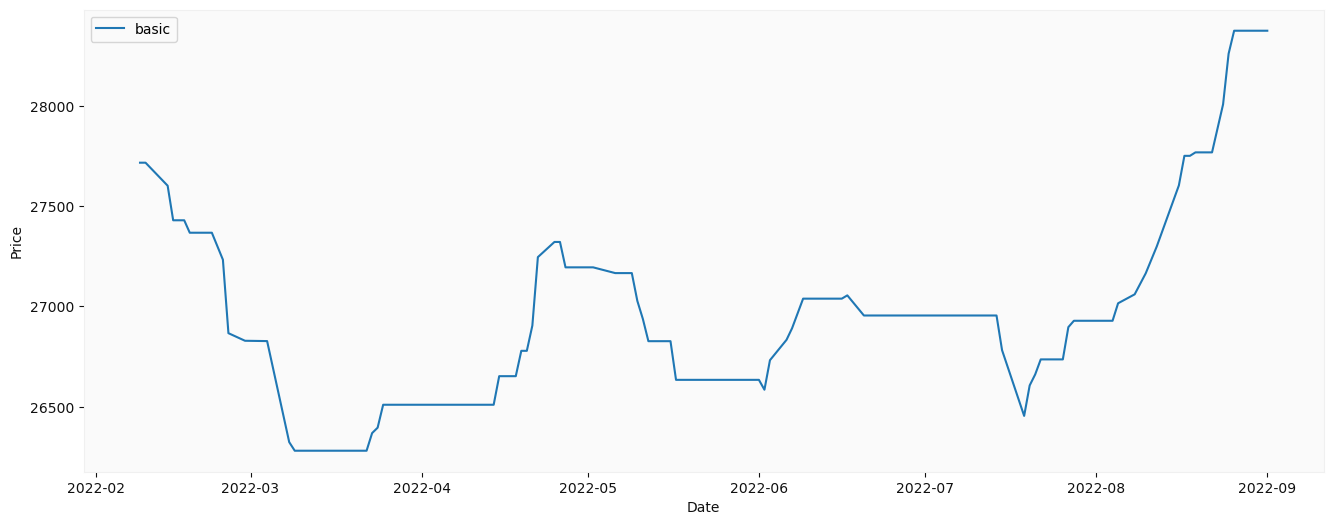

In [86]:
plt.figure(figsize=(16,6))
plt.plot(df['basic_line'], label='basic')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [87]:
#転換線
high9 = df['High'].rolling(window=9).max()
low9 =  df['Low'].rolling(window=9).min()

df['turn_line'] = ( high9 + low9 ) / 2

df.tail()

High           Low          Open         Close    Volume  \
Date                                                                           
2022-08-26  28792.929688  28608.699219  28639.470703  28641.380859  49100000   
2022-08-29  28179.089844  27788.119141  28161.060547  27878.960938  64100000   
2022-08-30  28233.800781  27944.250000  28086.720703  28195.580078  60700000   
2022-08-31  28104.800781  27906.169922  27928.089844  28091.529297  86200000   
2022-09-01  27832.779297  27589.699219  27797.000000  27661.470703  68900000   

               Adj Close         upper        middle         lower  \
Date                                                                 
2022-08-26  28641.380859  29214.023767  28246.903750  27279.783733   
2022-08-29  27878.960938  29214.657058  28245.475781  27276.294504   
2022-08-30  28195.580078  29208.936988  28265.328984  27321.720980   
2022-08-31  28091.529297  29196.264965  28282.781719  27369.298472   
2022-09-01  27661.470703  29199.715095  28280.610547  27361.505998   

                  macd  macdsignal    macdhist        RSI    basic_line  \
Date                                                                      
2022-08-26  335.470484  391.947909  -56.477425  57.685642  28373.929688   
2022-08-29  258.879449  365.334217 -106.454768  50.654808  28373.929688   
2022-08-30  221.179402  336.503254 -115.323852  53.126197  28373.929688   
2022-08-31  180.821418  305.366887 -124.545469  52.230710  28373.929688   
2022-09-01  112.834603  266.860430 -154.025827  48.696753  28373.929688   

               turn_line  
Date                      
2022-08-26  28752.490234  
2022-08-29  28505.444336  
2022-08-30  28469.459961  
2022-08-31  28469.459961  
2022-09-01  28208.955078

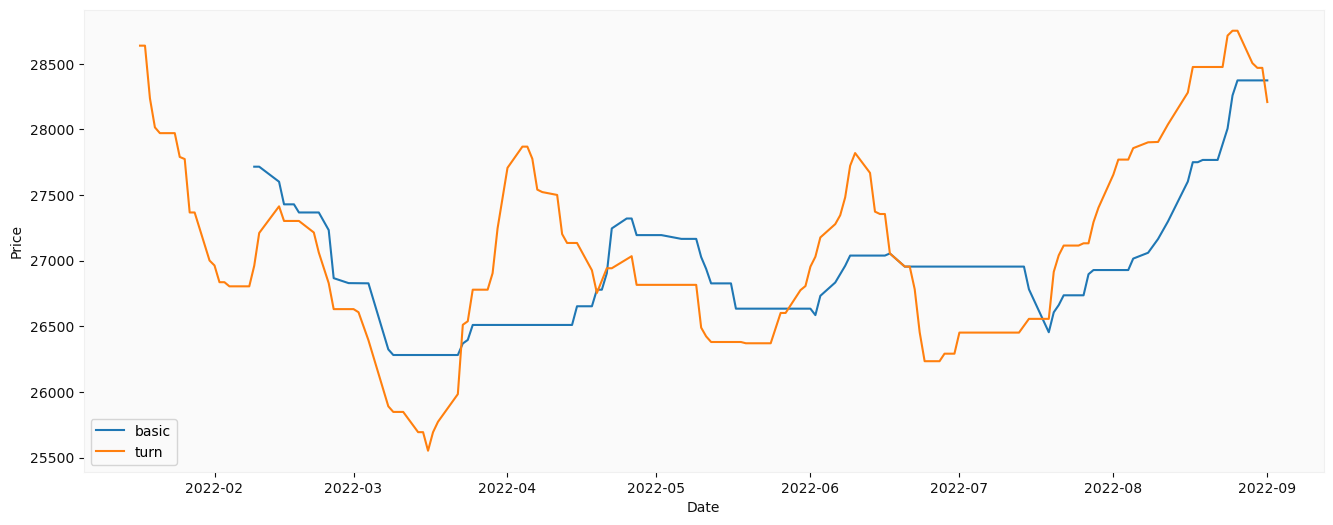

In [88]:
plt.figure(figsize=(16,6))
plt.plot(df['basic_line'], label='basic')
plt.plot(df['turn_line'], label='turn')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [89]:
#雲（先行スパン1、先行スパン2）
df['span1'] = (df['basic_line'] + df['turn_line']) / 2

In [91]:
high52 = df['High'].rolling(window=52).max()
low52 =  df['Low'].rolling(window=52).min()

df['span2'] = ( high52 + low52 ) / 2

df.tail()

High           Low          Open         Close    Volume  \
Date                                                                           
2022-08-26  28792.929688  28608.699219  28639.470703  28641.380859  49100000   
2022-08-29  28179.089844  27788.119141  28161.060547  27878.960938  64100000   
2022-08-30  28233.800781  27944.250000  28086.720703  28195.580078  60700000   
2022-08-31  28104.800781  27906.169922  27928.089844  28091.529297  86200000   
2022-09-01  27832.779297  27589.699219  27797.000000  27661.470703  68900000   

               Adj Close         upper        middle         lower  \
Date                                                                 
2022-08-26  28641.380859  29214.023767  28246.903750  27279.783733   
2022-08-29  27878.960938  29214.657058  28245.475781  27276.294504   
2022-08-30  28195.580078  29208.936988  28265.328984  27321.720980   
2022-08-31  28091.529297  29196.264965  28282.781719  27369.298472   
2022-09-01  27661.470703  29199.715095  28280.610547  27361.505998   

                  macd  macdsignal    macdhist        RSI    basic_line  \
Date                                                                      
2022-08-26  335.470484  391.947909  -56.477425  57.685642  28373.929688   
2022-08-29  258.879449  365.334217 -106.454768  50.654808  28373.929688   
2022-08-30  221.179402  336.503254 -115.323852  53.126197  28373.929688   
2022-08-31  180.821418  305.366887 -124.545469  52.230710  28373.929688   
2022-09-01  112.834603  266.860430 -154.025827  48.696753  28373.929688   

               turn_line         span1    span2  
Date                                             
2022-08-26  28752.490234  28563.209961  27371.5  
2022-08-29  28505.444336  28439.687012  27371.5  
2022-08-30  28469.459961  28421.694824  27371.5  
2022-08-31  28469.459961  28421.694824  27371.5  
2022-09-01  28208.955078  28291.442383  27371.5

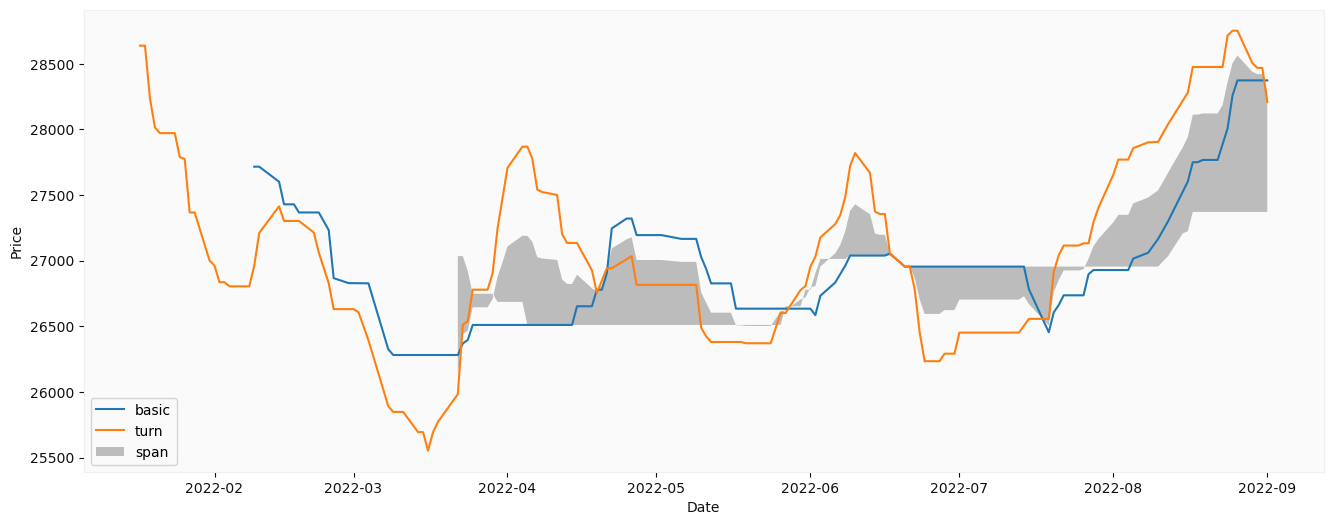

In [92]:
plt.figure(figsize=(16,6))
plt.plot(df['basic_line'], label='basic')
plt.plot(df['turn_line'], label='turn')
plt.fill_between(date, df['span1'], df['span2'], facecolor="gray", alpha=0.5, label="span")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [93]:
#遅行線
df['slow_line'] = df['Adj Close'].shift(-25)
df.head()

High           Low          Open         Close    Volume  \
Date                                                                           
2022-01-04  29323.789062  28954.560547  29098.410156  29301.789062  66000000   
2022-01-05  29388.160156  29204.449219  29288.800781  29332.160156  78600000   
2022-01-06  29158.949219  28487.869141  29136.750000  28487.869141  71600000   
2022-01-07  28813.089844  28293.699219  28711.529297  28478.560547  75200000   
2022-01-11  28473.470703  28089.490234  28380.900391  28222.480469  73700000   

               Adj Close  upper  middle  lower  macd  macdsignal  macdhist  \
Date                                                                         
2022-01-04  29301.789062    NaN     NaN    NaN   NaN         NaN       NaN   
2022-01-05  29332.160156    NaN     NaN    NaN   NaN         NaN       NaN   
2022-01-06  28487.869141    NaN     NaN    NaN   NaN         NaN       NaN   
2022-01-07  28478.560547    NaN     NaN    NaN   NaN         NaN       NaN   
2022-01-11  28222.480469    NaN     NaN    NaN   NaN         NaN       NaN   

            RSI  basic_line  turn_line  span1  span2     slow_line  
Date                                                                
2022-01-04  NaN         NaN        NaN    NaN    NaN  27579.869141  
2022-01-05  NaN         NaN        NaN    NaN    NaN  27696.080078  
2022-01-06  NaN         NaN        NaN    NaN    NaN  27079.589844  
2022-01-07  NaN         NaN        NaN    NaN    NaN  26865.189453  
2022-01-11  NaN         NaN        NaN    NaN    NaN  27460.400391

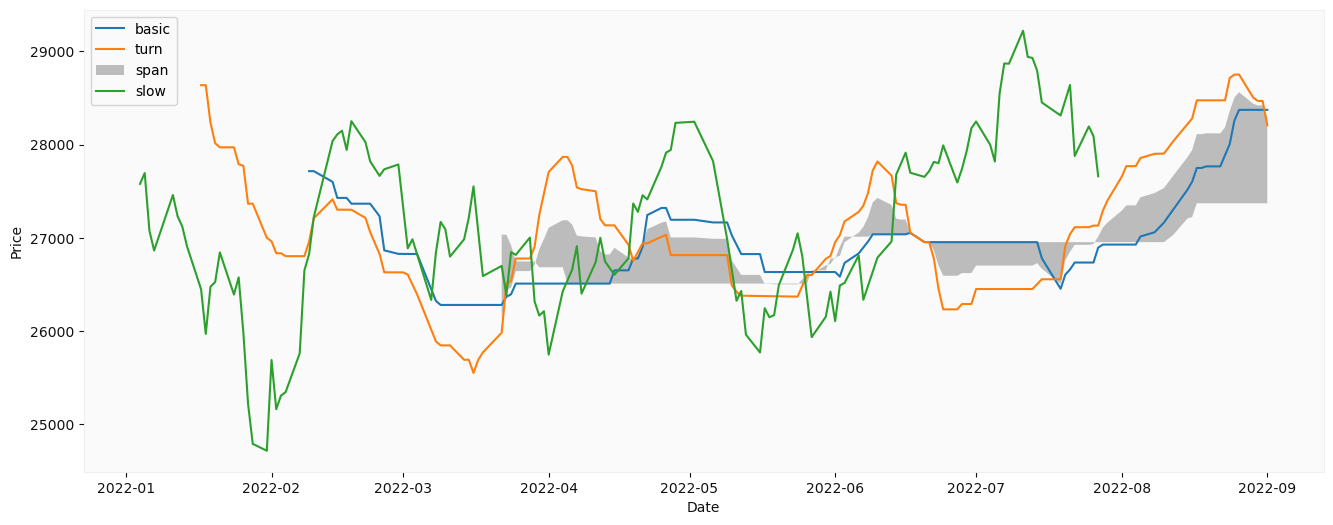

In [94]:
plt.figure(figsize=(16,6))
plt.plot(df['basic_line'], label='basic')
plt.plot(df['turn_line'], label='turn')
plt.fill_between(date, df['span1'], df['span2'], facecolor="gray", alpha=0.5, label="span")
plt.plot(df['slow_line'], label='slow')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#ローソク足
mpf.plot(df,type='candle',figsize=(16,6),style='classic', xrotation=0)

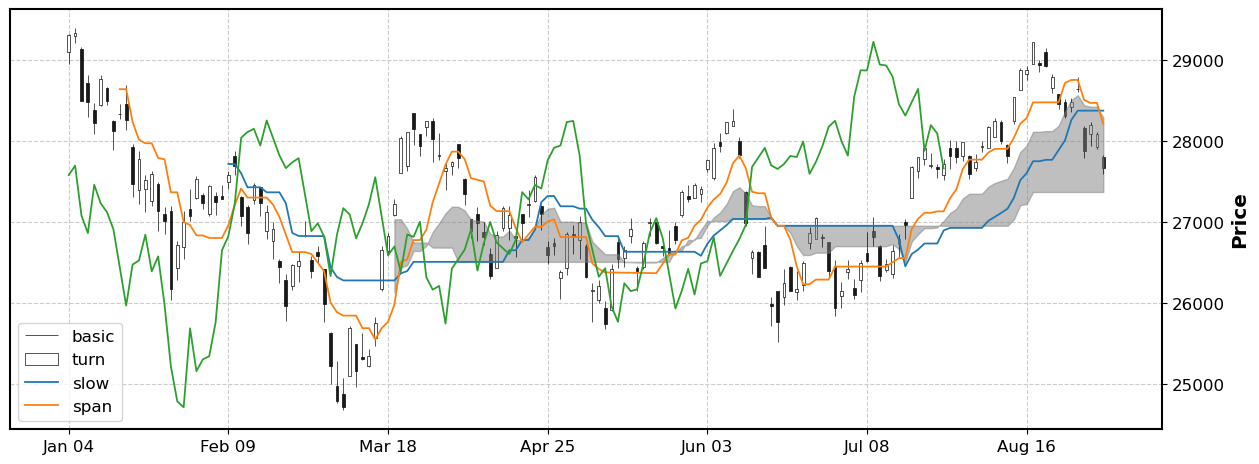

In [95]:
#基準線、転換線、雲、遅行線の追加
lines = [mpf.make_addplot(df['basic_line']), #基準線
        mpf.make_addplot(df['turn_line']),   #転換線
        mpf.make_addplot(df['slow_line']),   #遅行線
       ] 

labels = ["basic","turn","slow","span"]

fig, ax = mpf.plot(df, type='candle', figsize=(16,6), style='classic', xrotation=0, addplot=lines, returnfig=True,
                  fill_between=dict(y1=df['span1'].values, y2=df['span2'].values, alpha=0.5, color='gray') ) 
ax[0].legend(labels)
plt.show()

# mplfinanceに凡例を追加する方法は現状これしかないようです(https://github.com/matplotlib/mplfinance/issues/181)
# mplfinanceのfill_between(https://github.com/matplotlib/mplfinance/blob/master/examples/plot_customizations.ipynb)

In [96]:
lines = [mpf.make_addplot(df['basic_line']), #基準線
        mpf.make_addplot(df['turn_line']),   #転換線
        mpf.make_addplot(df['slow_line']),   #遅行線
       ] 

labels = ["basic","turn","slow","span"]

fig, ax = mpf.plot(df, type='candle', figsize=(16,6), style='classic', xrotation=0, addplot=lines, returnfig=True,
                  fill_between=dict(y1=df['span1'].values, y2=df['span2'].values, alpha=0.5,color='gray'), savefig='ichimoku.png' ) 
ax[0].legend(labels)

## 

## ＜第2章＞
## 5. ニューラルネットを使った株価予測（分類）

・LSTMで、金曜日の終値が木曜日の終値よりも上がるのか？下がるのか？を予測  

## 5-1. データの準備と前処理

In [15]:
#データの読み込み
from pandas_datareader import data

start = "1970-09-01"
end = "2022-09-01"

df = data.DataReader("^N225", "yahoo", start, end)

df.head()

High          Low         Open        Close  Volume  \
Date                                                                     
1970-09-01  2130.540039  2130.540039  2130.540039  2130.540039     0.0   
1970-09-02  2130.540039  2130.540039  2130.540039  2130.540039     0.0   
1970-09-03  2139.050049  2139.050049  2139.050049  2139.050049     0.0   
1970-09-04  2144.959961  2144.959961  2144.959961  2144.959961     0.0   
1970-09-07  2150.540039  2150.540039  2150.540039  2150.540039     0.0   

              Adj Close  
Date                     
1970-09-01  2130.540039  
1970-09-02  2130.540039  
1970-09-03  2139.050049  
1970-09-04  2144.959961  
1970-09-07  2150.540039

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12791 entries, 1970-09-01 to 2022-09-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       12791 non-null  float64
 1   Low        12791 non-null  float64
 2   Open       12791 non-null  float64
 3   Close      12791 non-null  float64
 4   Volume     12791 non-null  float64
 5   Adj Close  12791 non-null  float64
dtypes: float64(6)
memory usage: 699.5 KB


In [17]:
#曜日情報を追加 月曜が0
df['weekday'] = df.index.weekday
df.head()

High          Low         Open        Close  Volume  \
Date                                                                     
1970-09-01  2130.540039  2130.540039  2130.540039  2130.540039     0.0   
1970-09-02  2130.540039  2130.540039  2130.540039  2130.540039     0.0   
1970-09-03  2139.050049  2139.050049  2139.050049  2139.050049     0.0   
1970-09-04  2144.959961  2144.959961  2144.959961  2144.959961     0.0   
1970-09-07  2150.540039  2150.540039  2150.540039  2150.540039     0.0   

              Adj Close  weekday  
Date                              
1970-09-01  2130.540039        1  
1970-09-02  2130.540039        2  
1970-09-03  2139.050049        3  
1970-09-04  2144.959961        4  
1970-09-07  2150.540039        0

In [18]:
#初めの月曜日となる1970/9/7を基準に日数を追加
start = datetime(1970,9,7)
df['weeks'] = (df.index - start) // timedelta(weeks=1)
df

High           Low          Open         Close  \
Date                                                                 
1970-09-01   2130.540039   2130.540039   2130.540039   2130.540039   
1970-09-02   2130.540039   2130.540039   2130.540039   2130.540039   
1970-09-03   2139.050049   2139.050049   2139.050049   2139.050049   
1970-09-04   2144.959961   2144.959961   2144.959961   2144.959961   
1970-09-07   2150.540039   2150.540039   2150.540039   2150.540039   
...                  ...           ...           ...           ...   
2022-08-26  28792.929688  28608.699219  28639.470703  28641.380859   
2022-08-29  28179.089844  27788.119141  28161.060547  27878.960938   
2022-08-30  28233.800781  27944.250000  28086.720703  28195.580078   
2022-08-31  28104.800781  27906.169922  27928.089844  28091.529297   
2022-09-01  27832.779297  27589.699219  27797.000000  27661.470703   

                Volume     Adj Close  weekday  weeks  
Date                                                  
1970-09-01         0.0   2130.540039        1     -1  
1970-09-02         0.0   2130.540039        2     -1  
1970-09-03         0.0   2139.050049        3     -1  
1970-09-04         0.0   2144.959961        4     -1  
1970-09-07         0.0   2150.540039        0      0  
...                ...           ...      ...    ...  
2022-08-26  49100000.0  28641.380859        4   2711  
2022-08-29  64100000.0  27878.960938        0   2712  
2022-08-30  60700000.0  28195.580078        1   2712  
2022-08-31  86200000.0  28091.529297        2   2712  
2022-09-01  68900000.0  27661.470703        3   2712  

[12791 rows x 8 columns]

In [19]:
#カラムの並べ替え
df = df[['weeks', 'weekday', 'High', 'Low', 'Open', 'Close']]
df

weeks  weekday          High           Low          Open  \
Date                                                                   
1970-09-01     -1        1   2130.540039   2130.540039   2130.540039   
1970-09-02     -1        2   2130.540039   2130.540039   2130.540039   
1970-09-03     -1        3   2139.050049   2139.050049   2139.050049   
1970-09-04     -1        4   2144.959961   2144.959961   2144.959961   
1970-09-07      0        0   2150.540039   2150.540039   2150.540039   
...           ...      ...           ...           ...           ...   
2022-08-26   2711        4  28792.929688  28608.699219  28639.470703   
2022-08-29   2712        0  28179.089844  27788.119141  28161.060547   
2022-08-30   2712        1  28233.800781  27944.250000  28086.720703   
2022-08-31   2712        2  28104.800781  27906.169922  27928.089844   
2022-09-01   2712        3  27832.779297  27589.699219  27797.000000   

                   Close  
Date                      
1970-09-01   2130.540039  
1970-09-02   2130.540039  
1970-09-03   2139.050049  
1970-09-04   2144.959961  
1970-09-07   2150.540039  
...                  ...  
2022-08-26  28641.380859  
2022-08-29  27878.960938  
2022-08-30  28195.580078  
2022-08-31  28091.529297  
2022-09-01  27661.470703  

[12791 rows x 6 columns]

In [26]:
#カラム情報を1行上にずらしたデータフレームを作成する
df_shift = df.shift(-1)
df_shift

weeks  weekday          High           Low          Open  \
Date                                                                    
1970-09-01    -1.0      2.0   2130.540039   2130.540039   2130.540039   
1970-09-02    -1.0      3.0   2139.050049   2139.050049   2139.050049   
1970-09-03    -1.0      4.0   2144.959961   2144.959961   2144.959961   
1970-09-04     0.0      0.0   2150.540039   2150.540039   2150.540039   
1970-09-07     0.0      1.0   2165.179932   2165.179932   2165.179932   
...            ...      ...           ...           ...           ...   
2022-08-26  2712.0      0.0  28179.089844  27788.119141  28161.060547   
2022-08-29  2712.0      1.0  28233.800781  27944.250000  28086.720703   
2022-08-30  2712.0      2.0  28104.800781  27906.169922  27928.089844   
2022-08-31  2712.0      3.0  27832.779297  27589.699219  27797.000000   
2022-09-01     NaN      NaN           NaN           NaN           NaN   

                   Close   Up  Close_ratio  delta_Open_Close  
Date                                                          
1970-09-01   2130.540039  1.0     0.000000          0.000000  
1970-09-02   2139.050049  1.0     0.003994         -8.510010  
1970-09-03   2144.959961  1.0     0.002763         -5.909912  
1970-09-04   2150.540039  1.0     0.002601         -5.580078  
1970-09-07   2165.179932  1.0     0.006808        -14.639893  
...                  ...  ...          ...               ...  
2022-08-26  27878.960938  1.0    -0.026620        760.509766  
2022-08-29  28195.580078  0.0     0.011357        -34.519531  
2022-08-30  28091.529297  0.0    -0.003690         -4.808594  
2022-08-31  27661.470703  0.0    -0.015309        266.619141  
2022-09-01           NaN  NaN          NaN               NaN  

[12791 rows x 9 columns]

In [29]:
#翌日の終値と本日の終値の差分を追加する
df['delta_Close'] = df_shift['Close'] - df['Close']
df

weeks  weekday          High           Low          Open  \
Date                                                                   
1970-09-01     -1        1   2130.540039   2130.540039   2130.540039   
1970-09-02     -1        2   2130.540039   2130.540039   2130.540039   
1970-09-03     -1        3   2139.050049   2139.050049   2139.050049   
1970-09-04     -1        4   2144.959961   2144.959961   2144.959961   
1970-09-07      0        0   2150.540039   2150.540039   2150.540039   
...           ...      ...           ...           ...           ...   
2022-08-26   2711        4  28792.929688  28608.699219  28639.470703   
2022-08-29   2712        0  28179.089844  27788.119141  28161.060547   
2022-08-30   2712        1  28233.800781  27944.250000  28086.720703   
2022-08-31   2712        2  28104.800781  27906.169922  27928.089844   
2022-09-01   2712        3  27832.779297  27589.699219  27797.000000   

                   Close  Up  Close_ratio  delta_Open_Close  delta_Close  
Date                                                                      
1970-09-01   2130.540039   0          NaN          0.000000     0.000000  
1970-09-02   2130.540039   0     0.000000          8.510010     8.510010  
1970-09-03   2139.050049   0     0.003994          5.909912     5.909912  
1970-09-04   2144.959961   0     0.002763          5.580078     5.580078  
1970-09-07   2150.540039   0     0.002601         14.639893    14.639893  
...                  ...  ..          ...               ...          ...  
2022-08-26  28641.380859   0     0.005701       -480.320312  -762.419922  
2022-08-29  27878.960938   0    -0.026620        207.759766   316.619141  
2022-08-30  28195.580078   0     0.011357       -267.490234  -104.050781  
2022-08-31  28091.529297   0    -0.003690       -294.529297  -430.058594  
2022-09-01  27661.470703   0    -0.015309               NaN          NaN  

[12791 rows x 10 columns]

In [30]:
#目的変数Upを追加する(翌日の終値が上がる場合1、それ以外は0とする)、'delta_Close'カラムの削除
df['Up'] = 0
df['Up'][df['delta_Close'] > 0] = 1
df = df.drop('delta_Close', axis=1)
df

weeks  weekday          High           Low          Open  \
Date                                                                   
1970-09-01     -1        1   2130.540039   2130.540039   2130.540039   
1970-09-02     -1        2   2130.540039   2130.540039   2130.540039   
1970-09-03     -1        3   2139.050049   2139.050049   2139.050049   
1970-09-04     -1        4   2144.959961   2144.959961   2144.959961   
1970-09-07      0        0   2150.540039   2150.540039   2150.540039   
...           ...      ...           ...           ...           ...   
2022-08-26   2711        4  28792.929688  28608.699219  28639.470703   
2022-08-29   2712        0  28179.089844  27788.119141  28161.060547   
2022-08-30   2712        1  28233.800781  27944.250000  28086.720703   
2022-08-31   2712        2  28104.800781  27906.169922  27928.089844   
2022-09-01   2712        3  27832.779297  27589.699219  27797.000000   

                   Close  Up  Close_ratio  delta_Open_Close  
Date                                                         
1970-09-01   2130.540039   0          NaN          0.000000  
1970-09-02   2130.540039   1     0.000000          8.510010  
1970-09-03   2139.050049   1     0.003994          5.909912  
1970-09-04   2144.959961   1     0.002763          5.580078  
1970-09-07   2150.540039   1     0.002601         14.639893  
...                  ...  ..          ...               ...  
2022-08-26  28641.380859   0     0.005701       -480.320312  
2022-08-29  27878.960938   1    -0.026620        207.759766  
2022-08-30  28195.580078   0     0.011357       -267.490234  
2022-08-31  28091.529297   0    -0.003690       -294.529297  
2022-09-01  27661.470703   0    -0.015309               NaN  

[12791 rows x 9 columns]

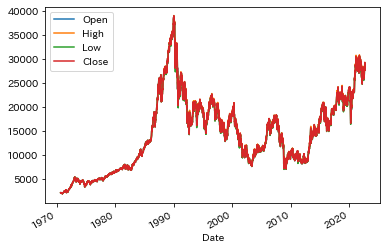

In [31]:
#'Open', 'High', 'Low', 'Close'グラフ化のためにカラム抽出
df_new = df[['Open', 'High', 'Low', 'Close']]

#matplotlibのインポート
from matplotlib import pyplot as plt

#時系列折れ線グラフの作成
df_new.plot(kind='line')
plt.show()

In [32]:
#終値の前日比の追加
df_shift = df.shift(1)

df['Close_ratio'] = (df['Close'] - df_shift['Close']) / df_shift['Close']
df

weeks  weekday          High           Low          Open  \
Date                                                                   
1970-09-01     -1        1   2130.540039   2130.540039   2130.540039   
1970-09-02     -1        2   2130.540039   2130.540039   2130.540039   
1970-09-03     -1        3   2139.050049   2139.050049   2139.050049   
1970-09-04     -1        4   2144.959961   2144.959961   2144.959961   
1970-09-07      0        0   2150.540039   2150.540039   2150.540039   
...           ...      ...           ...           ...           ...   
2022-08-26   2711        4  28792.929688  28608.699219  28639.470703   
2022-08-29   2712        0  28179.089844  27788.119141  28161.060547   
2022-08-30   2712        1  28233.800781  27944.250000  28086.720703   
2022-08-31   2712        2  28104.800781  27906.169922  27928.089844   
2022-09-01   2712        3  27832.779297  27589.699219  27797.000000   

                   Close  Up  Close_ratio  delta_Open_Close  
Date                                                         
1970-09-01   2130.540039   0          NaN          0.000000  
1970-09-02   2130.540039   1     0.000000          8.510010  
1970-09-03   2139.050049   1     0.003994          5.909912  
1970-09-04   2144.959961   1     0.002763          5.580078  
1970-09-07   2150.540039   1     0.002601         14.639893  
...                  ...  ..          ...               ...  
2022-08-26  28641.380859   0     0.005701       -480.320312  
2022-08-29  27878.960938   1    -0.026620        207.759766  
2022-08-30  28195.580078   0     0.011357       -267.490234  
2022-08-31  28091.529297   0    -0.003690       -294.529297  
2022-09-01  27661.470703   0    -0.015309               NaN  

[12791 rows x 9 columns]

In [33]:
#OpenとCloseの差分を実体Bodyとして計算
df['Body'] = df['Open'] - df['Close']
df

weeks  weekday          High           Low          Open  \
Date                                                                   
1970-09-01     -1        1   2130.540039   2130.540039   2130.540039   
1970-09-02     -1        2   2130.540039   2130.540039   2130.540039   
1970-09-03     -1        3   2139.050049   2139.050049   2139.050049   
1970-09-04     -1        4   2144.959961   2144.959961   2144.959961   
1970-09-07      0        0   2150.540039   2150.540039   2150.540039   
...           ...      ...           ...           ...           ...   
2022-08-26   2711        4  28792.929688  28608.699219  28639.470703   
2022-08-29   2712        0  28179.089844  27788.119141  28161.060547   
2022-08-30   2712        1  28233.800781  27944.250000  28086.720703   
2022-08-31   2712        2  28104.800781  27906.169922  27928.089844   
2022-09-01   2712        3  27832.779297  27589.699219  27797.000000   

                   Close  Up  Close_ratio  delta_Open_Close        Body  
Date                                                                     
1970-09-01   2130.540039   0          NaN          0.000000    0.000000  
1970-09-02   2130.540039   1     0.000000          8.510010    0.000000  
1970-09-03   2139.050049   1     0.003994          5.909912    0.000000  
1970-09-04   2144.959961   1     0.002763          5.580078    0.000000  
1970-09-07   2150.540039   1     0.002601         14.639893    0.000000  
...                  ...  ..          ...               ...         ...  
2022-08-26  28641.380859   0     0.005701       -480.320312   -1.910156  
2022-08-29  27878.960938   1    -0.026620        207.759766  282.099609  
2022-08-30  28195.580078   0     0.011357       -267.490234 -108.859375  
2022-08-31  28091.529297   0    -0.003690       -294.529297 -163.439453  
2022-09-01  27661.470703   0    -0.015309               NaN  135.529297  

[12791 rows x 10 columns]

In [34]:
#週番号をリストに格納
list_weeks = []
list_weeks = df['weeks'].unique()
list_weeks

array([  -1,    0,    1, ..., 2710, 2711, 2712], dtype=int64)

In [35]:
#各週ごとの日数を入力
df['week_days'] = 0

#for文なので少し重め
for i in list_weeks:
  df['week_days'][df['weeks'] == i] = len(df[df['weeks'] == i])

df

weeks  weekday          High           Low          Open  \
Date                                                                   
1970-09-01     -1        1   2130.540039   2130.540039   2130.540039   
1970-09-02     -1        2   2130.540039   2130.540039   2130.540039   
1970-09-03     -1        3   2139.050049   2139.050049   2139.050049   
1970-09-04     -1        4   2144.959961   2144.959961   2144.959961   
1970-09-07      0        0   2150.540039   2150.540039   2150.540039   
...           ...      ...           ...           ...           ...   
2022-08-26   2711        4  28792.929688  28608.699219  28639.470703   
2022-08-29   2712        0  28179.089844  27788.119141  28161.060547   
2022-08-30   2712        1  28233.800781  27944.250000  28086.720703   
2022-08-31   2712        2  28104.800781  27906.169922  27928.089844   
2022-09-01   2712        3  27832.779297  27589.699219  27797.000000   

                   Close  Up  Close_ratio  delta_Open_Close        Body  \
Date                                                                      
1970-09-01   2130.540039   0          NaN          0.000000    0.000000   
1970-09-02   2130.540039   1     0.000000          8.510010    0.000000   
1970-09-03   2139.050049   1     0.003994          5.909912    0.000000   
1970-09-04   2144.959961   1     0.002763          5.580078    0.000000   
1970-09-07   2150.540039   1     0.002601         14.639893    0.000000   
...                  ...  ..          ...               ...         ...   
2022-08-26  28641.380859   0     0.005701       -480.320312   -1.910156   
2022-08-29  27878.960938   1    -0.026620        207.759766  282.099609   
2022-08-30  28195.580078   0     0.011357       -267.490234 -108.859375   
2022-08-31  28091.529297   0    -0.003690       -294.529297 -163.439453   
2022-09-01  27661.470703   0    -0.015309               NaN  135.529297   

            week_days  
Date                   
1970-09-01          4  
1970-09-02          4  
1970-09-03          4  
1970-09-04          4  
1970-09-07          5  
...               ...  
2022-08-26          5  
2022-08-29          4  
2022-08-30          4  
2022-08-31          4  
2022-09-01          4  

[12791 rows x 11 columns]

In [36]:
#月曜〜金曜まで5日分データのある週だけデータを取り出す
df = df[df['week_days'] == 5]
df

weeks  weekday          High           Low          Open  \
Date                                                                   
1970-09-07      0        0   2150.540039   2150.540039   2150.540039   
1970-09-08      0        1   2165.179932   2165.179932   2165.179932   
1970-09-09      0        2   2176.989990   2176.989990   2176.989990   
1970-09-10      0        3   2165.469971   2165.469971   2165.469971   
1970-09-11      0        4   2157.260010   2157.260010   2157.260010   
...           ...      ...           ...           ...           ...   
2022-08-22   2711        0  28828.210938  28586.359375  28654.070312   
2022-08-23   2711        1  28580.199219  28395.300781  28580.199219   
2022-08-24   2711        2  28515.609375  28282.210938  28481.339844   
2022-08-25   2711        3  28534.710938  28357.029297  28415.109375   
2022-08-26   2711        4  28792.929688  28608.699219  28639.470703   

                   Close  Up  Close_ratio  delta_Open_Close        Body  \
Date                                                                      
1970-09-07   2150.540039   1     0.002601         14.639893    0.000000   
1970-09-08   2165.179932   1     0.006808         11.810059    0.000000   
1970-09-09   2176.989990   0     0.005455        -11.520020    0.000000   
1970-09-10   2165.469971   0    -0.005292         -8.209961    0.000000   
1970-09-11   2157.260010   1    -0.003791         11.139893    0.000000   
...                  ...  ..          ...               ...         ...   
2022-08-22  28794.500000   0    -0.004695       -214.300781 -140.429688   
2022-08-23  28452.750000   0    -0.011869         28.589844  127.449219   
2022-08-24  28313.470703   1    -0.004895        101.638672  167.869141   
2022-08-25  28479.009766   1     0.005847        160.460938  -63.900391   
2022-08-26  28641.380859   0     0.005701       -480.320312   -1.910156   

            week_days  
Date                   
1970-09-07          5  
1970-09-08          5  
1970-09-09          5  
1970-09-10          5  
1970-09-11          5  
...               ...  
2022-08-22          5  
2022-08-23          5  
2022-08-24          5  
2022-08-25          5  
2022-08-26          5  

[10630 rows x 11 columns]

In [37]:
#金曜日のデータを削除する(weekday:4となるデータ)
df = df[df['weekday'] != 4]
df

weeks  weekday          High           Low          Open  \
Date                                                                   
1970-09-07      0        0   2150.540039   2150.540039   2150.540039   
1970-09-08      0        1   2165.179932   2165.179932   2165.179932   
1970-09-09      0        2   2176.989990   2176.989990   2176.989990   
1970-09-10      0        3   2165.469971   2165.469971   2165.469971   
1970-09-14      1        0   2168.399902   2168.399902   2168.399902   
...           ...      ...           ...           ...           ...   
2022-08-18   2710        3  28999.640625  28846.519531  28957.400391   
2022-08-22   2711        0  28828.210938  28586.359375  28654.070312   
2022-08-23   2711        1  28580.199219  28395.300781  28580.199219   
2022-08-24   2711        2  28515.609375  28282.210938  28481.339844   
2022-08-25   2711        3  28534.710938  28357.029297  28415.109375   

                   Close  Up  Close_ratio  delta_Open_Close        Body  \
Date                                                                      
1970-09-07   2150.540039   1     0.002601         14.639893    0.000000   
1970-09-08   2165.179932   1     0.006808         11.810059    0.000000   
1970-09-09   2176.989990   0     0.005455        -11.520020    0.000000   
1970-09-10   2165.469971   0    -0.005292         -8.209961    0.000000   
1970-09-14   2168.399902   0     0.005164          0.000000    0.000000   
...                  ...  ..          ...               ...         ...   
2022-08-18  28942.140625   0    -0.009603        153.570312   15.259766   
2022-08-22  28794.500000   0    -0.004695       -214.300781 -140.429688   
2022-08-23  28452.750000   0    -0.011869         28.589844  127.449219   
2022-08-24  28313.470703   1    -0.004895        101.638672  167.869141   
2022-08-25  28479.009766   1     0.005847        160.460938  -63.900391   

            week_days  
Date                   
1970-09-07          5  
1970-09-08          5  
1970-09-09          5  
1970-09-10          5  
1970-09-14          5  
...               ...  
2022-08-18          5  
2022-08-22          5  
2022-08-23          5  
2022-08-24          5  
2022-08-25          5  

[8504 rows x 11 columns]

In [38]:
#不要カラムの削除と並べ替え
df = df[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body', 'Up']]
df

weekday          High           Low          Open         Close  \
Date                                                                          
1970-09-07        0   2150.540039   2150.540039   2150.540039   2150.540039   
1970-09-08        1   2165.179932   2165.179932   2165.179932   2165.179932   
1970-09-09        2   2176.989990   2176.989990   2176.989990   2176.989990   
1970-09-10        3   2165.469971   2165.469971   2165.469971   2165.469971   
1970-09-14        0   2168.399902   2168.399902   2168.399902   2168.399902   
...             ...           ...           ...           ...           ...   
2022-08-18        3  28999.640625  28846.519531  28957.400391  28942.140625   
2022-08-22        0  28828.210938  28586.359375  28654.070312  28794.500000   
2022-08-23        1  28580.199219  28395.300781  28580.199219  28452.750000   
2022-08-24        2  28515.609375  28282.210938  28481.339844  28313.470703   
2022-08-25        3  28534.710938  28357.029297  28415.109375  28479.009766   

            Close_ratio        Body  Up  
Date                                     
1970-09-07     0.002601    0.000000   1  
1970-09-08     0.006808    0.000000   1  
1970-09-09     0.005455    0.000000   0  
1970-09-10    -0.005292    0.000000   0  
1970-09-14     0.005164    0.000000   0  
...                 ...         ...  ..  
2022-08-18    -0.009603   15.259766   0  
2022-08-22    -0.004695 -140.429688   0  
2022-08-23    -0.011869  127.449219   0  
2022-08-24    -0.004895  167.869141   1  
2022-08-25     0.005847  -63.900391   1  

[8504 rows x 8 columns]

## 5-2. 学習データと検証データへの分割

・学習データ：['2018-01-01' : '2020-12-31']  
・検証データ：['2021-01-01' : ]

In [39]:
#学習データを2018-01-01〜2020-12-31の期間としdf_trainに入力する
df_train = df['2018-01-01' : '2020-12-31']
df_train

weekday          High           Low          Open         Close  \
Date                                                                          
2018-01-15        0  23833.269531  23685.019531  23827.980469  23714.880859   
2018-01-16        1  23962.070312  23701.830078  23721.169922  23951.810547   
2018-01-17        2  23891.630859  23739.169922  23783.419922  23868.339844   
2018-01-18        3  24084.419922  23699.470703  24078.929688  23763.369141   
2018-01-22        0  23816.330078  23697.810547  23797.839844  23816.330078   
...             ...           ...           ...           ...           ...   
2020-12-17        3  26843.050781  26676.279297  26744.500000  26806.669922   
2020-12-21        0  26905.669922  26533.630859  26834.099609  26714.419922   
2020-12-22        1  26639.990234  26361.660156  26559.330078  26436.390625   
2020-12-23        2  26585.210938  26414.740234  26580.429688  26524.789062   
2020-12-24        3  26764.529297  26605.259766  26635.109375  26668.349609   

            Close_ratio        Body  Up  
Date                                     
2018-01-15     0.002581  113.099609   1  
2018-01-16     0.009991 -230.640625   0  
2018-01-17    -0.003485  -84.919922   0  
2018-01-18    -0.004398  315.560547   1  
2018-01-22     0.000347  -18.490234   1  
...                 ...         ...  ..  
2020-12-17     0.001841  -62.169922   0  
2020-12-21    -0.001830  119.679688   0  
2020-12-22    -0.010407  122.939453   1  
2020-12-23     0.003344   55.640625   1  
2020-12-24     0.005412  -33.240234   0  

[480 rows x 8 columns]

In [129]:
#検証データを2021-01-01以降としてとしてdf_valに入力する
df_val = df['2021-01-01' : ]
df_val

weekday          High           Low          Open         Close  \
Date                                                                          
2021-01-04        0  27602.109375  27042.320312  27575.570312  27258.380859   
2021-01-05        1  27279.779297  27073.460938  27151.380859  27158.630859   
2021-01-06        2  27196.400391  27002.179688  27102.849609  27055.939453   
2021-01-07        3  27624.730469  27340.460938  27340.460938  27490.130859   
2021-01-18        0  28349.970703  28111.539062  28238.679688  28242.210938   
...             ...           ...           ...           ...           ...   
2022-08-18        3  28999.640625  28846.519531  28957.400391  28942.140625   
2022-08-22        0  28828.210938  28586.359375  28654.070312  28794.500000   
2022-08-23        1  28580.199219  28395.300781  28580.199219  28452.750000   
2022-08-24        2  28515.609375  28282.210938  28481.339844  28313.470703   
2022-08-25        3  28534.710938  28357.029297  28415.109375  28479.009766   

            Close_ratio        Body  Up  
Date                                     
2021-01-04    -0.006770  317.189453   0  
2021-01-05    -0.003659   -7.250000   0  
2021-01-06    -0.003781   46.910156   1  
2021-01-07     0.016048 -149.669922   1  
2021-01-18    -0.009712   -3.531250   1  
...                 ...         ...  ..  
2022-08-18    -0.009603   15.259766   0  
2022-08-22    -0.004695 -140.429688   0  
2022-08-23    -0.011869  127.449219   0  
2022-08-24    -0.004895  167.869141   1  
2022-08-25     0.005847  -63.900391   1  

[264 rows x 8 columns]

In [130]:
#学習データを説明変数(X_train)と目的変数(y_train)に分ける
X_train = df_train[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body']]
y_train = df_train['Up']

#学習データの説明変数と目的変数を確認
print(X_train)
print(y_train)

            weekday          High           Low          Open         Close  \
Date                                                                          
2018-01-15        0  23833.269531  23685.019531  23827.980469  23714.880859   
2018-01-16        1  23962.070312  23701.830078  23721.169922  23951.810547   
2018-01-17        2  23891.630859  23739.169922  23783.419922  23868.339844   
2018-01-18        3  24084.419922  23699.470703  24078.929688  23763.369141   
2018-01-22        0  23816.330078  23697.810547  23797.839844  23816.330078   
...             ...           ...           ...           ...           ...   
2020-12-17        3  26843.050781  26676.279297  26744.500000  26806.669922   
2020-12-21        0  26905.669922  26533.630859  26834.099609  26714.419922   
2020-12-22        1  26639.990234  26361.660156  26559.330078  26436.390625   
2020-12-23        2  26585.210938  26414.740234  26580.429688  26524.789062   
2020-12-24        3  26764.529297  26605.259766  266

In [131]:
#検証データを説明変数(X_val)と目的変数(y_val)に分ける
X_val = df_val[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body']]
y_val = df_val['Up']

#検証データの説明変数と目的変数を確認
print(X_val)
print(y_val)

            weekday          High           Low          Open         Close  \
Date                                                                          
2021-01-04        0  27602.109375  27042.320312  27575.570312  27258.380859   
2021-01-05        1  27279.779297  27073.460938  27151.380859  27158.630859   
2021-01-06        2  27196.400391  27002.179688  27102.849609  27055.939453   
2021-01-07        3  27624.730469  27340.460938  27340.460938  27490.130859   
2021-01-18        0  28349.970703  28111.539062  28238.679688  28242.210938   
...             ...           ...           ...           ...           ...   
2022-08-18        3  28999.640625  28846.519531  28957.400391  28942.140625   
2022-08-22        0  28828.210938  28586.359375  28654.070312  28794.500000   
2022-08-23        1  28580.199219  28395.300781  28580.199219  28452.750000   
2022-08-24        2  28515.609375  28282.210938  28481.339844  28313.470703   
2022-08-25        3  28534.710938  28357.029297  284

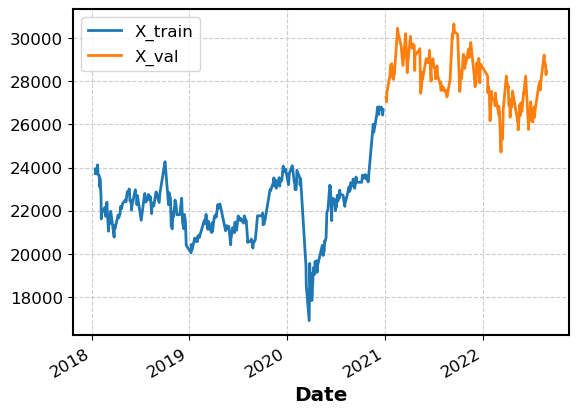

In [132]:
# 学習データと検証データの終値(Close)の折れ線グラフ作成
X_train['Close'].plot(kind='line')
X_val['Close'].plot(kind='line')

# グラフの凡例を設定
plt.legend(['X_train', 'X_val'])

# グラフの表示
plt.show()

In [133]:
# 標準化関数(StandardScaler)のインポート
from sklearn.preprocessing import StandardScaler

# numpyのインポート
import numpy as np

# 4日ごとにデータを抜き出して、標準化ととnumpy配列に変換する関数(std_to_np)の定義
def std_to_np(df):
    df_list = []
    df = np.array(df)
    for i in range(0, len(df) - 3, 4): #range(start,stop,step)
        df_s = df[i:i+4]
        scl = StandardScaler()
        df_std = scl.fit_transform(df_s)
        df_list.append(df_std)
    return np.array(df_list)

In [134]:
# 学習データと検証データの説明変数に関数(std_to_np)を実行
X_train_np_array = std_to_np(X_train)
X_val_np_array = std_to_np(X_val)

# 学習データと検証データの形の確認
print(X_train_np_array.shape)
print(X_val_np_array.shape)

(120, 4, 7)
(66, 4, 7)


In [135]:
# 学習データと検証データの目的変数を確認
print(y_train)
print(y_val)

Date
2018-01-15    1
2018-01-16    0
2018-01-17    0
2018-01-18    1
2018-01-22    1
             ..
2020-12-17    0
2020-12-21    0
2020-12-22    1
2020-12-23    1
2020-12-24    0
Name: Up, Length: 480, dtype: int64
Date
2021-01-04    0
2021-01-05    0
2021-01-06    1
2021-01-07    1
2021-01-18    1
             ..
2022-08-18    0
2022-08-22    0
2022-08-23    0
2022-08-24    1
2022-08-25    1
Name: Up, Length: 264, dtype: int64


In [136]:
# 学習データ、検証データの目的変数の間引き
# 週の4日目(木曜日)のデータだけ抜き出す
y_train_new = y_train[3::4]
y_val_new = y_val[3::4]

# 間引き後の学習データと検証データの目的変数を確認
print(y_train_new)
print(y_val_new)

Date
2018-01-18    1
2018-01-25    0
2018-02-01    0
2018-02-08    0
2018-02-22    1
             ..
2020-11-19    0
2020-12-03    0
2020-12-10    0
2020-12-17    0
2020-12-24    0
Name: Up, Length: 120, dtype: int64
Date
2021-01-07    1
2021-01-21    0
2021-01-28    0
2021-02-04    1
2021-02-18    0
             ..
2022-07-14    1
2022-07-28    0
2022-08-04    1
2022-08-18    0
2022-08-25    1
Name: Up, Length: 66, dtype: int64


## 5-3. 予測モデルの作成と評価

In [137]:
# keras.modelsからSequentialのインポート
from keras.models import Sequential
# keras.layersからDense、LSTMのインポート
from keras.layers import Dense, LSTM
# Dropoutのインポート
from keras.layers import Dropout

In [138]:
# LSTM構築とコンパイル関数
def lstm_comp(df):
    # 入力層/中間層/出力層のネットワークを構築
    model = Sequential()
    model.add(LSTM(256, activation='relu', batch_input_shape=(None, df.shape[1], df.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # ネットワークのコンパイル
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [139]:
# 時系列分割のためTimeSeriesSplitのインポート
from sklearn.model_selection import TimeSeriesSplit
# accuracy算出のためaccuracy_scoreのインポート
from sklearn.metrics import accuracy_score

In [140]:
#交差検証
valid_scores = []
tscv = TimeSeriesSplit(n_splits=4)

In [141]:
for fold, (train_indices, valid_indices) in enumerate(tscv.split(X_train_np_array)):
    X_train, X_valid = X_train_np_array[train_indices], X_train_np_array[valid_indices]
    y_train, y_valid = y_train_new[train_indices], y_train_new[valid_indices]

    # LSTM構築とコンパイル関数にX_trainを渡し、変数modelに代入
    model = lstm_comp(X_train)

    # モデル学習
    model.fit(X_train, y_train, epochs=10, batch_size=64)

    # 予測
    y_valid_pred = model.predict(X_valid)

    # 予測結果の2値化
    y_valid_pred = np.where(y_valid_pred < 0.5, 0, 1)

    # 予測精度の算出と表示
    score = accuracy_score(y_valid, y_valid_pred)
    print(f'fold {fold} MAE: {score}')

    # 予測精度スコアをリストに格納
    valid_scores.append(score)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6956 - accuracy: 0.4583
Epoch 2/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 18ms/step - loss: 0.6862 - accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6854 - accuracy: 0.5417
Epoch 5/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6831 - accuracy: 0.5417
Epoch 6/10
1/1 [==============================] - 0s 18ms/step - loss: 0.6806 - accuracy: 0.5417
Epoch 7/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6789 - accuracy: 0.5417
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6721 - accuracy: 0.5417
Epoch 9/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6705 - accuracy: 0.5417
Epoch 10/10
1/1 [==============================] - 0s 466ms/step
fold 0 MAE: 0.5
Epoch 1/10
1/1 [==============================] 

In [142]:
print(f'valid_scores: {valid_scores}')
cv_score = np.mean(valid_scores)
print(f'CV score: {cv_score}')

valid_scores: [0.5, 0.7083333333333334, 0.5416666666666666, 0.375]
CV score: 0.53125


In [145]:
# LSTM構築とコンパイル関数にX_train_np_arrayを渡し、変数modelに代入
model = lstm_comp(X_train_np_array)

# モデルの学習の実行
result = model.fit(X_train_np_array, y_train_new, epochs=10, batch_size=64)

Epoch 1/10
2/2 [==============================] - 3s 22ms/step - loss: 0.6956 - accuracy: 0.4667
Epoch 2/10
2/2 [==============================] - 0s 22ms/step - loss: 0.6926 - accuracy: 0.5417
Epoch 3/10
2/2 [==============================] - 0s 22ms/step - loss: 0.6891 - accuracy: 0.5250
Epoch 4/10
2/2 [==============================] - 0s 22ms/step - loss: 0.6901 - accuracy: 0.5167
Epoch 5/10
2/2 [==============================] - 0s 22ms/step - loss: 0.6882 - accuracy: 0.5500
Epoch 6/10
2/2 [==============================] - 0s 22ms/step - loss: 0.6869 - accuracy: 0.5167
Epoch 7/10
2/2 [==============================] - 0s 23ms/step - loss: 0.6840 - accuracy: 0.6417
Epoch 8/10
2/2 [==============================] - 0s 23ms/step - loss: 0.6858 - accuracy: 0.5833
Epoch 9/10
2/2 [==============================] - 0s 22ms/step - loss: 0.6800 - accuracy: 0.6333
Epoch 10/10
2/2 [==============================] - 0s 23ms/step - loss: 0.6799 - accuracy: 0.6083


In [146]:
# 作成したモデルより検証データを用いて予測を行う
pred = model.predict(X_val_np_array)
pred[:10]

3/3 [==============================] - 0s 8ms/step


array([[0.4707471 ],
       [0.50564426],
       [0.50727665],
       [0.52916175],
       [0.5395451 ],
       [0.5341411 ],
       [0.4773848 ],
       [0.4920771 ],
       [0.46420282],
       [0.51994234]], dtype=float32)

In [147]:
# 予測結果を0もしくは1に修正（0.5を境にして、1に近いほど株価が上昇、0に近いほど株価が上昇しない）
pred = np.where(pred < 0.5, 0, 1)

# 修正した予測結果の先頭10件を確認
pred[:10]

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [148]:
# 実際の結果から予測値の正解率を計算する
from sklearn.metrics import accuracy_score
print('accuracy = ', accuracy_score(y_true=y_val_new, y_pred=pred))

accuracy =  0.5454545454545454


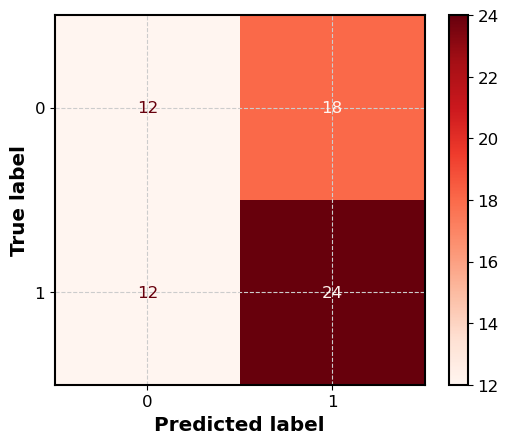

In [149]:
# 混同行列生成のためconfusion_matrixをインポート
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 混同行列を表示
cm = confusion_matrix(y_val_new, pred)
cmp = ConfusionMatrixDisplay(cm)
cmp.plot(cmap=plt.cm.Reds)

## 

## ＜第3章＞
## 6. 線形回帰を使った株価予測（回帰）

・線形回帰で、金曜日の終値が木曜日の終値を参照していくらになるか予測 

## 6-1. データの準備と前処理

In [33]:
#データの読み込み
from pandas_datareader import data

start = "2018-01-01"
end = "2021-12-31"

df = data.DataReader("^N225", "yahoo", start, end)
df.head()

High           Low          Open         Close  \
Date                                                                 
2018-01-04  23506.330078  23065.199219  23073.730469  23506.330078   
2018-01-05  23730.470703  23520.519531  23643.000000  23714.529297   
2018-01-09  23952.609375  23789.029297  23948.970703  23849.990234   
2018-01-10  23864.759766  23755.449219  23832.810547  23788.199219   
2018-01-11  23734.970703  23601.839844  23656.390625  23710.429688   

                 Volume     Adj Close  
Date                                   
2018-01-04  102200000.0  23506.330078  
2018-01-05  101900000.0  23714.529297  
2018-01-09   94100000.0  23849.990234  
2018-01-10   88800000.0  23788.199219  
2018-01-11   83700000.0  23710.429688

In [34]:
# 曜日情報を追加(0:月曜日〜4:金曜日)
df['weekday'] = df.index.weekday
df

High           Low          Open         Close  \
Date                                                                 
2018-01-04  23506.330078  23065.199219  23073.730469  23506.330078   
2018-01-05  23730.470703  23520.519531  23643.000000  23714.529297   
2018-01-09  23952.609375  23789.029297  23948.970703  23849.990234   
2018-01-10  23864.759766  23755.449219  23832.810547  23788.199219   
2018-01-11  23734.970703  23601.839844  23656.390625  23710.429688   
...                  ...           ...           ...           ...   
2021-12-24  28870.130859  28773.500000  28836.050781  28782.589844   
2021-12-27  28805.279297  28658.820312  28786.330078  28676.460938   
2021-12-28  29121.009766  28879.679688  28953.320312  29069.160156   
2021-12-29  29106.279297  28729.609375  28995.730469  28906.880859   
2021-12-30  28904.419922  28579.490234  28794.240234  28791.710938   

                 Volume     Adj Close  weekday  
Date                                            
2018-01-04  102200000.0  23506.330078        3  
2018-01-05  101900000.0  23714.529297        4  
2018-01-09   94100000.0  23849.990234        1  
2018-01-10   88800000.0  23788.199219        2  
2018-01-11   83700000.0  23710.429688        3  
...                 ...           ...      ...  
2021-12-24   35900000.0  28782.589844        4  
2021-12-27   37500000.0  28676.460938        0  
2021-12-28   47000000.0  29069.160156        1  
2021-12-29   44700000.0  28906.880859        2  
2021-12-30   40400000.0  28791.710938        3  

[974 rows x 7 columns]

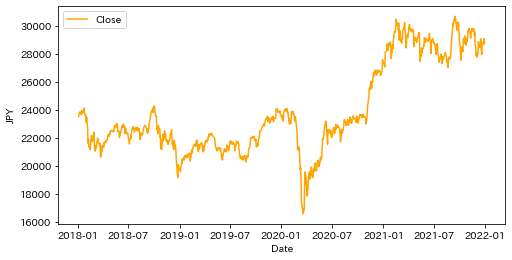

In [35]:
# グラフの描画
plt.figure(figsize=(8, 4))
plt.plot(df['Adj Close'], label='Close', color='orange')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
plt.show()

In [36]:
# data_techinicalにデータをコピー
df_technical = df.copy()

In [37]:
# 単純移動平均を追加
df_technical["5日間移動平均"]=df_technical["Adj Close"].rolling(5).mean().round(1)
df_technical["25日間移動平均"]=df_technical["Adj Close"].rolling(25).mean().round(1)
df_technical["50日間移動平均"]=df_technical["Adj Close"].rolling(50).mean().round(1)

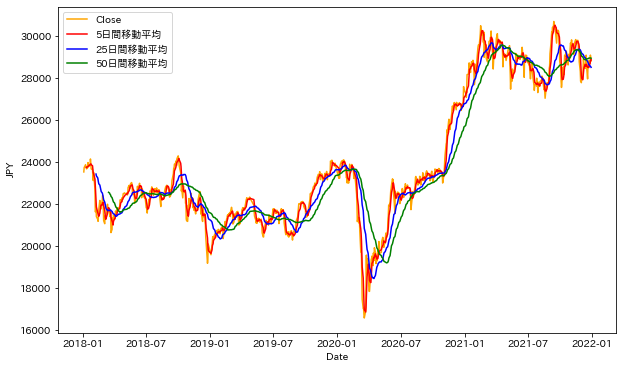

In [38]:
# 特徴量を描画して確認
plt.figure(figsize=(10, 6))
plt.plot(df_technical['Close'], label='Close', color='orange')
plt.plot(df_technical['5日間移動平均'], label='5日間移動平均', color='red')
plt.plot(df_technical['25日間移動平均'], label='25日間移動平均', color='blue')
plt.plot(df_technical['50日間移動平均'], label='50日間移動平均', color='green')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
plt.show()

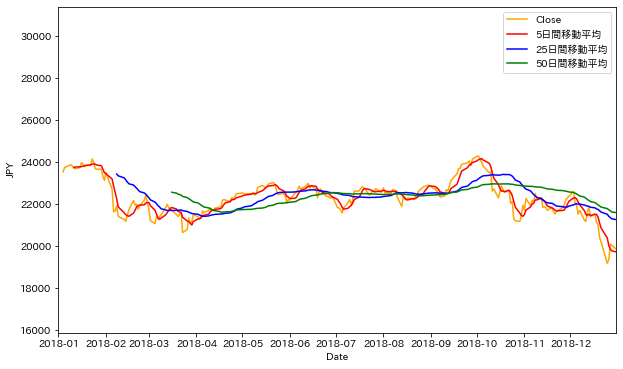

In [39]:
# 特徴量を描画して確認(x軸の拡大)
plt.figure(figsize=(10, 6))
plt.plot(df_technical['Close'], label='Close', color='orange')
plt.plot(df_technical['5日間移動平均'], label='5日間移動平均', color='red')
plt.plot(df_technical['25日間移動平均'], label='25日間移動平均', color='blue')
plt.plot(df_technical['50日間移動平均'], label='50日間移動平均', color='green')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
xmin = datetime(2018,1,1)
xmax = datetime(2018,12,31)
plt.xlim([xmin,xmax])
plt.show()

In [40]:
# OpenとCloseの差分を実体Bodyとして計算
df_technical['Body'] = df_technical['Open'] - df_technical['Adj Close']

# 前日終値との差分Close_diffを計算
df_technical['Close_diff'] = df_technical['Adj Close'].diff(1)

# 目的変数となる翌日の終値Close_nextの追加
df_technical['Close_next'] = df_technical['Adj Close'].shift(-1)
df_technical

High           Low          Open         Close  \
Date                                                                 
2018-01-04  23506.330078  23065.199219  23073.730469  23506.330078   
2018-01-05  23730.470703  23520.519531  23643.000000  23714.529297   
2018-01-09  23952.609375  23789.029297  23948.970703  23849.990234   
2018-01-10  23864.759766  23755.449219  23832.810547  23788.199219   
2018-01-11  23734.970703  23601.839844  23656.390625  23710.429688   
...                  ...           ...           ...           ...   
2021-12-24  28870.130859  28773.500000  28836.050781  28782.589844   
2021-12-27  28805.279297  28658.820312  28786.330078  28676.460938   
2021-12-28  29121.009766  28879.679688  28953.320312  29069.160156   
2021-12-29  29106.279297  28729.609375  28995.730469  28906.880859   
2021-12-30  28904.419922  28579.490234  28794.240234  28791.710938   

                 Volume     Adj Close  weekday  5日間移動平均  25日間移動平均  50日間移動平均  \
Date                                                                          
2018-01-04  102200000.0  23506.330078        3      NaN       NaN       NaN   
2018-01-05  101900000.0  23714.529297        4      NaN       NaN       NaN   
2018-01-09   94100000.0  23849.990234        1      NaN       NaN       NaN   
2018-01-10   88800000.0  23788.199219        2      NaN       NaN       NaN   
2018-01-11   83700000.0  23710.429688        3  23713.9       NaN       NaN   
...                 ...           ...      ...      ...       ...       ...   
2021-12-24   35900000.0  28782.589844        4  28519.7   28601.9   28928.6   
2021-12-27   37500000.0  28676.460938        0  28667.4   28559.1   28931.1   
2021-12-28   47000000.0  29069.160156        1  28777.8   28530.9   28931.1   
2021-12-29   44700000.0  28906.880859        2  28846.7   28515.1   28928.7   
2021-12-30   40400000.0  28791.710938        3  28845.4   28486.8   28920.2   

                  Body  Close_diff    Close_next  
Date                                              
2018-01-04 -432.599609         NaN  23714.529297  
2018-01-05  -71.529297  208.199219  23849.990234  
2018-01-09   98.980469  135.460938  23788.199219  
2018-01-10   44.611328  -61.791016  23710.429688  
2018-01-11  -54.039062  -77.769531  23653.820312  
...                ...         ...           ...  
2021-12-24   53.460938  -15.779297  28676.460938  
2021-12-27  109.869141 -106.128906  29069.160156  
2021-12-28 -115.839844  392.699219  28906.880859  
2021-12-29   88.849609 -162.279297  28791.710938  
2021-12-30    2.529297 -115.169922           NaN  

[974 rows x 13 columns]

In [41]:
# 欠損値がある行を削除
df_technical = df_technical.dropna(how='any')
df_technical

High           Low          Open         Close  \
Date                                                                 
2018-03-16  21879.279297  21632.849609  21876.529297  21676.509766   
2018-03-19  21659.039062  21366.880859  21537.900391  21480.900391   
2018-03-20  21384.859375  21223.970703  21297.980469  21380.970703   
2018-03-22  21592.000000  21349.710938  21352.160156  21591.990234   
2018-03-23  21188.800781  20559.609375  21188.800781  20617.859375   
...                  ...           ...           ...           ...   
2021-12-23  28798.369141  28640.150391  28703.009766  28798.369141   
2021-12-24  28870.130859  28773.500000  28836.050781  28782.589844   
2021-12-27  28805.279297  28658.820312  28786.330078  28676.460938   
2021-12-28  29121.009766  28879.679688  28953.320312  29069.160156   
2021-12-29  29106.279297  28729.609375  28995.730469  28906.880859   

                 Volume     Adj Close  weekday  5日間移動平均  25日間移動平均  50日間移動平均  \
Date                                                                          
2018-03-16   75700000.0  21676.509766        4  21810.0   21670.3   22537.6   
2018-03-19   67300000.0  21480.900391        0  21741.3   21674.3   22497.1   
2018-03-20   66500000.0  21380.970703        1  21623.9   21679.7   22450.4   
2018-03-22   82600000.0  21591.990234        3  21586.9   21697.2   22405.3   
2018-03-23  121000000.0  20617.859375        4  21349.6   21663.4   22341.8   
...                 ...           ...      ...      ...       ...       ...   
2021-12-23   43600000.0  28798.369141        3  28472.3   28634.6   28915.7   
2021-12-24   35900000.0  28782.589844        4  28519.7   28601.9   28928.6   
2021-12-27   37500000.0  28676.460938        0  28667.4   28559.1   28931.1   
2021-12-28   47000000.0  29069.160156        1  28777.8   28530.9   28931.1   
2021-12-29   44700000.0  28906.880859        2  28846.7   28515.1   28928.7   

                  Body  Close_diff    Close_next  
Date                                              
2018-03-16  200.019531 -127.439453  21480.900391  
2018-03-19   57.000000 -195.609375  21380.970703  
2018-03-20  -82.990234  -99.929688  21591.990234  
2018-03-22 -239.830078  211.019531  20617.859375  
2018-03-23  570.941406 -974.130859  20766.099609  
...                ...         ...           ...  
2021-12-23  -95.359375  236.158203  28782.589844  
2021-12-24   53.460938  -15.779297  28676.460938  
2021-12-27  109.869141 -106.128906  29069.160156  
2021-12-28 -115.839844  392.699219  28906.880859  
2021-12-29   88.849609 -162.279297  28791.710938  

[924 rows x 13 columns]

In [42]:
# 木曜日のデータを抜き出す
df_technical = df_technical[df_technical['weekday'] == 3]
df_technical

High           Low          Open         Close  \
Date                                                                 
2018-03-22  21592.000000  21349.710938  21352.160156  21591.990234   
2018-03-29  21298.570312  20996.220703  21250.960938  21159.080078   
2018-04-05  21737.660156  21462.099609  21541.179688  21645.419922   
2018-04-12  21719.429688  21591.390625  21657.869141  21660.279297   
2018-04-19  22360.650391  22176.859375  22231.859375  22191.179688   
...                  ...           ...           ...           ...   
2021-11-25  29570.419922  29444.449219  29469.650391  29499.279297   
2021-12-02  27938.550781  27644.960938  27716.199219  27753.369141   
2021-12-09  28908.289062  28725.470703  28827.320312  28725.470703   
2021-12-16  29070.080078  28782.189453  28868.369141  29066.320312   
2021-12-23  28798.369141  28640.150391  28703.009766  28798.369141   

                Volume     Adj Close  weekday  5日間移動平均  25日間移動平均  50日間移動平均  \
Date                                                                         
2018-03-22  82600000.0  21591.990234        3  21586.9   21697.2   22405.3   
2018-03-29  78900000.0  21159.080078        3  20978.3   21523.7   22126.7   
2018-04-05  80700000.0  21645.419922        3  21420.0   21398.1   21881.1   
2018-04-12  58400000.0  21660.279297        3  21677.5   21468.8   21685.6   
2018-04-19  79700000.0  22191.179688        3  21962.2   21525.0   21598.8   
...                ...           ...      ...      ...       ...       ...   
2021-11-25  50700000.0  29499.279297        3  29584.1   29353.7   29289.3   
2021-12-02  77400000.0  27753.369141        3  28109.3   29196.5   29051.2   
2021-12-09  54400000.0  28725.470703        3  28399.7   29037.3   28888.1   
2021-12-16  60300000.0  29066.320312        3  28607.4   28866.5   28868.2   
2021-12-23  43600000.0  28798.369141        3  28472.3   28634.6   28915.7   

                  Body  Close_diff    Close_next  
Date                                              
2018-03-22 -239.830078  211.019531  20617.859375  
2018-03-29   91.880859  127.769531  21454.300781  
2018-04-05 -104.240234  325.869141  21567.519531  
2018-04-12   -2.410156  -26.820312  21778.740234  
2018-04-19   40.679688   32.980469  22162.240234  
...                ...         ...           ...  
2021-11-25  -29.628906  196.619141  28751.619141  
2021-12-02  -37.169922 -182.250000  28029.570312  
2021-12-09  101.849609 -135.148438  28437.769531  
2021-12-16 -197.951172  606.599609  28545.679688  
2021-12-23  -95.359375  236.158203  28782.589844  

[185 rows x 13 columns]

In [43]:
# 必要なカラムを抽出
df_technical = df_technical[['High', 'Low', 'Open', 'Adj Close', 'Body',
                    'Close_diff', '5日間移動平均', '25日間移動平均', '50日間移動平均', 'Close_next']]
df_technical

High           Low          Open     Adj Close  \
Date                                                                 
2018-03-22  21592.000000  21349.710938  21352.160156  21591.990234   
2018-03-29  21298.570312  20996.220703  21250.960938  21159.080078   
2018-04-05  21737.660156  21462.099609  21541.179688  21645.419922   
2018-04-12  21719.429688  21591.390625  21657.869141  21660.279297   
2018-04-19  22360.650391  22176.859375  22231.859375  22191.179688   
...                  ...           ...           ...           ...   
2021-11-25  29570.419922  29444.449219  29469.650391  29499.279297   
2021-12-02  27938.550781  27644.960938  27716.199219  27753.369141   
2021-12-09  28908.289062  28725.470703  28827.320312  28725.470703   
2021-12-16  29070.080078  28782.189453  28868.369141  29066.320312   
2021-12-23  28798.369141  28640.150391  28703.009766  28798.369141   

                  Body  Close_diff  5日間移動平均  25日間移動平均  50日間移動平均    Close_next  
Date                                                                           
2018-03-22 -239.830078  211.019531  21586.9   21697.2   22405.3  20617.859375  
2018-03-29   91.880859  127.769531  20978.3   21523.7   22126.7  21454.300781  
2018-04-05 -104.240234  325.869141  21420.0   21398.1   21881.1  21567.519531  
2018-04-12   -2.410156  -26.820312  21677.5   21468.8   21685.6  21778.740234  
2018-04-19   40.679688   32.980469  21962.2   21525.0   21598.8  22162.240234  
...                ...         ...      ...       ...       ...           ...  
2021-11-25  -29.628906  196.619141  29584.1   29353.7   29289.3  28751.619141  
2021-12-02  -37.169922 -182.250000  28109.3   29196.5   29051.2  28029.570312  
2021-12-09  101.849609 -135.148438  28399.7   29037.3   28888.1  28437.769531  
2021-12-16 -197.951172  606.599609  28607.4   28866.5   28868.2  28545.679688  
2021-12-23  -95.359375  236.158203  28472.3   28634.6   28915.7  28782.589844  

[185 rows x 10 columns]

## 6-2. 学習データと検証データへの分割

・学習データ：['2018-01-01' : '2020-12-31']  
・検証データ：['2021-01-01' : ]

In [44]:
# 2018年〜2020年を学習用データとする
train = df_technical['2018-01-01' : '2020-12-31']
train

High           Low          Open     Adj Close  \
Date                                                                 
2018-03-22  21592.000000  21349.710938  21352.160156  21591.990234   
2018-03-29  21298.570312  20996.220703  21250.960938  21159.080078   
2018-04-05  21737.660156  21462.099609  21541.179688  21645.419922   
2018-04-12  21719.429688  21591.390625  21657.869141  21660.279297   
2018-04-19  22360.650391  22176.859375  22231.859375  22191.179688   
...                  ...           ...           ...           ...   
2020-11-26  26560.029297  26255.470703  26255.470703  26537.310547   
2020-12-03  26868.089844  26719.230469  26740.300781  26809.369141   
2020-12-10  26852.769531  26639.980469  26688.500000  26756.240234   
2020-12-17  26843.050781  26676.279297  26744.500000  26806.669922   
2020-12-24  26764.529297  26605.259766  26635.109375  26668.349609   

                  Body  Close_diff  5日間移動平均  25日間移動平均  50日間移動平均    Close_next  
Date                                                                           
2018-03-22 -239.830078  211.019531  21586.9   21697.2   22405.3  20617.859375  
2018-03-29   91.880859  127.769531  20978.3   21523.7   22126.7  21454.300781  
2018-04-05 -104.240234  325.869141  21420.0   21398.1   21881.1  21567.519531  
2018-04-12   -2.410156  -26.820312  21677.5   21468.8   21685.6  21778.740234  
2018-04-19   40.679688   32.980469  21962.2   21525.0   21598.8  22162.240234  
...                ...         ...      ...       ...       ...           ...  
2020-11-26 -281.839844  240.451172  26032.3   24662.9   24048.6  26644.710938  
2020-12-03  -69.068359    8.388672  26695.2   25297.5   24373.8  26751.240234  
2020-12-10  -67.740234  -61.699219  26668.0   25962.4   24710.4  26652.519531  
2020-12-17  -62.169922   49.269531  26727.4   26366.8   25053.2  26763.390625  
2020-12-24  -33.240234  143.560547  26621.5   26548.9   25358.3  26656.609375  

[138 rows x 10 columns]

In [45]:
# 2021年をテストデータとする
test = df_technical['2021-01-01' :]
test

High           Low          Open     Adj Close  \
Date                                                                 
2021-01-07  27624.730469  27340.460938  27340.460938  27490.130859   
2021-01-14  28979.529297  28411.580078  28442.730469  28698.259766   
2021-01-21  28846.150391  28677.609375  28710.410156  28756.859375   
2021-01-28  28360.480469  27975.849609  28169.269531  28197.419922   
2021-02-04  28600.220703  28325.890625  28557.460938  28341.949219   
...                  ...           ...           ...           ...   
2021-11-25  29570.419922  29444.449219  29469.650391  29499.279297   
2021-12-02  27938.550781  27644.960938  27716.199219  27753.369141   
2021-12-09  28908.289062  28725.470703  28827.320312  28725.470703   
2021-12-16  29070.080078  28782.189453  28868.369141  29066.320312   
2021-12-23  28798.369141  28640.150391  28703.009766  28798.369141   

                  Body  Close_diff  5日間移動平均  25日間移動平均  50日間移動平均    Close_next  
Date                                                                           
2021-01-07 -149.669922  434.191406  27281.5   26847.2   25939.8  28139.029297  
2021-01-14 -255.529297  241.669922  28189.7   27109.2   26334.3  28519.179688  
2021-01-21  -46.449219  233.599609  28535.0   27479.1   26819.9  28631.449219  
2021-01-28  -28.150391 -437.791016  28566.5   27843.3   27156.5  27663.390625  
2021-02-04  215.511719 -304.550781  28221.0   28161.8   27402.3  28779.189453  
...                ...         ...      ...       ...       ...           ...  
2021-11-25  -29.628906  196.619141  29584.1   29353.7   29289.3  28751.619141  
2021-12-02  -37.169922 -182.250000  28109.3   29196.5   29051.2  28029.570312  
2021-12-09  101.849609 -135.148438  28399.7   29037.3   28888.1  28437.769531  
2021-12-16 -197.951172  606.599609  28607.4   28866.5   28868.2  28545.679688  
2021-12-23  -95.359375  236.158203  28472.3   28634.6   28915.7  28782.589844  

[47 rows x 10 columns]

In [64]:
# 学習用データとテストデータそれぞれを説明変数と目的変数に分離する
X_train = train.drop(columns=['Close_next']) #学習用データ説明変数
y_train = train['Close_next'] #学習用データ目的変数

X_test = test.drop(columns=['Close_next']) #テストデータ説明変数
y_test = test['Close_next'] #テストデータ目的変数

In [65]:
X_train

High           Low          Open     Adj Close  \
Date                                                                 
2018-03-22  21592.000000  21349.710938  21352.160156  21591.990234   
2018-03-29  21298.570312  20996.220703  21250.960938  21159.080078   
2018-04-05  21737.660156  21462.099609  21541.179688  21645.419922   
2018-04-12  21719.429688  21591.390625  21657.869141  21660.279297   
2018-04-19  22360.650391  22176.859375  22231.859375  22191.179688   
...                  ...           ...           ...           ...   
2020-11-26  26560.029297  26255.470703  26255.470703  26537.310547   
2020-12-03  26868.089844  26719.230469  26740.300781  26809.369141   
2020-12-10  26852.769531  26639.980469  26688.500000  26756.240234   
2020-12-17  26843.050781  26676.279297  26744.500000  26806.669922   
2020-12-24  26764.529297  26605.259766  26635.109375  26668.349609   

                  Body  Close_diff  5日間移動平均  25日間移動平均  50日間移動平均  
Date                                                             
2018-03-22 -239.830078  211.019531  21586.9   21697.2   22405.3  
2018-03-29   91.880859  127.769531  20978.3   21523.7   22126.7  
2018-04-05 -104.240234  325.869141  21420.0   21398.1   21881.1  
2018-04-12   -2.410156  -26.820312  21677.5   21468.8   21685.6  
2018-04-19   40.679688   32.980469  21962.2   21525.0   21598.8  
...                ...         ...      ...       ...       ...  
2020-11-26 -281.839844  240.451172  26032.3   24662.9   24048.6  
2020-12-03  -69.068359    8.388672  26695.2   25297.5   24373.8  
2020-12-10  -67.740234  -61.699219  26668.0   25962.4   24710.4  
2020-12-17  -62.169922   49.269531  26727.4   26366.8   25053.2  
2020-12-24  -33.240234  143.560547  26621.5   26548.9   25358.3  

[138 rows x 9 columns]

## 6-3. 予測モデルの作成と評価（回帰）

In [66]:
# 線形回帰モデルのLinearRegressionをインポート
from sklearn.linear_model import LinearRegression

# 時系列分割のためTimeSeriesSplitのインポート
from sklearn.model_selection import TimeSeriesSplit

# 予測精度検証のためMSEをインポート
from sklearn.metrics import mean_squared_error as mse

In [67]:
# 時系列分割交差検証
valid_scores = []
tscv = TimeSeriesSplit(n_splits=4)

for fold, (train_indices, valid_indices) in enumerate(tscv.split(X_train)):
    X_train_cv, X_valid_cv = X_train.iloc[train_indices], X_train.iloc[valid_indices]
    y_train_cv, y_valid_cv = y_train.iloc[train_indices], y_train.iloc[valid_indices]

    # 線形回帰モデルのインスタンス化
    model = LinearRegression()
    
    # モデル学習
    model.fit(X_train_cv, y_train_cv)
    
    # 予測
    y_valid_pred = model.predict(X_valid_cv)
    
    # 予測精度(RMSE)の算出
    score = np.sqrt(mse(y_valid_cv, y_valid_pred))
    
    # 予測精度スコアをリストに格納
    valid_scores.append(score)

In [68]:
print(f'valid_scores: {valid_scores}')
cv_score = np.mean(valid_scores)
print(f'CV score: {cv_score}')
#およそ300円の誤差で予測できている

valid_scores: [342.72969876709027, 165.71658005805065, 440.6741343005106, 207.90041807328691]
CV score: 289.25520779973465


In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = np.sqrt(mse(y_test, y_pred))
print(f'RMSE: {score}')

RMSE: 445.6143785757777


In [70]:
# 実際のデータと予測データをデータフレームにまとめる
df_result = test[['Close_next']]
df_result['Close_pred'] = y_pred
df_result

Close_next    Close_pred
Date                                  
2021-01-07  28139.029297  27276.500450
2021-01-14  28519.179688  28612.836441
2021-01-21  28631.449219  28626.682490
2021-01-28  27663.390625  28058.909934
2021-02-04  28779.189453  28343.446375
...                  ...           ...
2021-11-25  28751.619141  29219.733156
2021-12-02  28029.570312  27470.990426
2021-12-09  28437.769531  28711.672022
2021-12-16  28545.679688  28877.493067
2021-12-23  28782.589844  28691.835492

[47 rows x 2 columns]

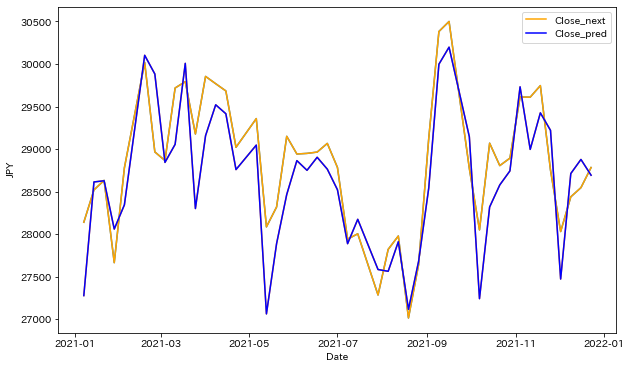

In [71]:
# 実際のデータと予測データの比較グラフ作成
plt.figure(figsize=(10, 6))
plt.plot(df_result[['Close_next', 'Close_pred']])
plt.plot(df_result['Close_next'], label='Close_next', color='orange')
plt.plot(df_result['Close_pred'], label='Close_pred', color='blue')
plt.xlabel('Date')
plt.ylabel('JPY')
xmin = df_result.index.min()
xmax = df_result.index.max()
plt.legend()
plt.show()

In [72]:
# 誤差を算出
df_result['diff'] = df_result['Close_pred'] - df_result['Close_next']

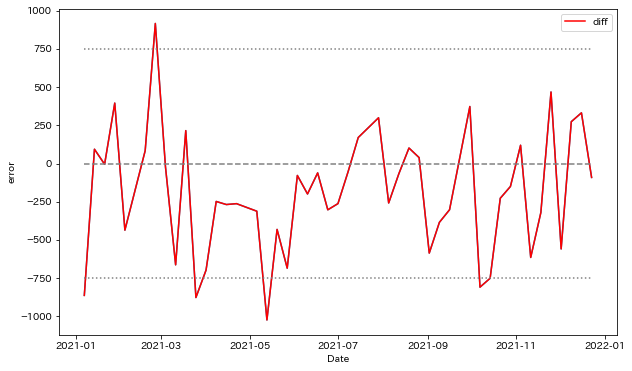

In [73]:
# 誤差のグラフ作成
plt.figure(figsize=(10, 6))
plt.plot(df_result[['diff']])
plt.plot(df_result['diff'], label='diff', color='red')
plt.xlabel('Date')
plt.ylabel('error')
plt.hlines(0, xmin, xmax, color='gray', linestyle='--')
plt.hlines(750, xmin, xmax, color='gray', linestyle=':')
plt.hlines(-750, xmin, xmax, color='gray', linestyle=':')
plt.legend()
plt.show()

In [74]:
# 予測モデルの係数を確認
coef = pd.DataFrame(model.coef_) # データフレームの作成
coef.index = X_train.columns     # 項目名をインデックスに設定
coef

0
High       -0.257988
Low        -0.144197
Open        0.676552
Adj Close   1.106458
Body       -0.429907
Close_diff -0.327504
5日間移動平均    -0.377548
25日間移動平均   -0.018355
50日間移動平均   -0.007705

In [75]:
# 予測モデルの切片を確認
model.intercept_# 予測モデルの切片を確認
model.intercept_

502.4423459989084

In [76]:
# X_train基本統計量の確認
X_train.describe()

High           Low          Open     Adj Close        Body  \
count    138.000000    138.000000    138.000000    138.000000  138.000000   
mean   22301.674932  22069.684917  22206.909519  22176.387653   30.521867   
std     1590.932344   1636.271763   1591.048626   1626.318778  163.410890   
min    17160.970703  16358.190430  16995.769531  16552.830078 -371.429688   
25%    21446.345215  21234.909668  21371.152344  21331.381836  -64.075195   
50%    22320.160156  22111.674805  22243.844727  22230.804688   21.565430   
75%    23203.060547  22888.586914  23110.392090  23023.372559  114.844238   
max    26868.089844  26719.230469  26744.500000  26809.369141  570.169922   

       Close_diff       5日間移動平均      25日間移動平均      50日間移動平均  
count  138.000000    138.000000    138.000000    138.000000  
mean   -26.370881  22169.420290  22094.840580  22042.297101  
std    265.136289   1578.625507   1369.760266   1118.764666  
min   -915.179688  16944.800000  18432.700000  19182.800000  
25%   -162.933594  21257.900000  21336.125000  21263.975000  
50%     -3.995117  22197.100000  22163.750000  22089.000000  
75%    118.366211  23138.575000  22874.550000  22723.800000  
max    750.558594  26727.400000  26548.900000  25358.300000

In [ ]:
#データを標準化したほうがよい

## 

## 番外編＠2.：個別銘柄のデータを可視化してみる 
・リクルートホールディングス等の個別銘柄のデータを取得してみる  
・また、取得から可視化までを関数化させてみる

In [124]:
#リクルートホールディングス
from pandas_datareader import data

sample = data.DataReader('6098.JP', 'stooq')
sample

Open     High      Low    Close    Volume
Date                                                    
2022-10-03  4100.00  4268.00  4033.00  4239.00   4713600
2022-09-30  4156.00  4223.00  4120.00  4161.00   6026200
2022-09-29  4255.00  4276.00  4172.00  4206.00   5035600
2022-09-28  4151.00  4190.00  4078.00  4155.00   5438200
2022-09-27  4135.00  4209.00  4101.00  4187.00   4704000
...             ...      ...      ...      ...       ...
2017-10-12  2678.87  2715.09  2667.11  2711.18  13344247
2017-10-11  2580.95  2673.98  2572.14  2655.37  12436491
2017-10-10  2489.90  2584.87  2484.03  2580.95  10967416
2017-10-06  2418.43  2515.36  2416.47  2489.90   8785760
2017-10-05  2410.59  2439.96  2406.67  2429.20   4686460

[1215 rows x 5 columns]

In [125]:
sample.index.min(), sample.index.max()

(Timestamp('2017-10-05 00:00:00'), Timestamp('2022-10-03 00:00:00'))

In [126]:
#データの取得順を古い日付順に変更する
sample = sample.sort_index()
sample.head()

Open     High      Low    Close    Volume
Date                                                    
2017-10-05  2410.59  2439.96  2406.67  2429.20   4686460
2017-10-06  2418.43  2515.36  2416.47  2489.90   8785760
2017-10-10  2489.90  2584.87  2484.03  2580.95  10967416
2017-10-11  2580.95  2673.98  2572.14  2655.37  12436491
2017-10-12  2678.87  2715.09  2667.11  2711.18  13344247

In [127]:
sample.index >= '2018-09-01 00:00:00'

array([False, False, False, ...,  True,  True,  True])

In [128]:
sample[sample.index >= '2018-09-01 00:00:00']

Open     High      Low    Close   Volume
Date                                                   
2018-09-03  3297.67  3339.78  3254.59  3325.08  2615005
2018-09-04  3348.58  3381.87  3314.30  3320.19  3604264
2018-09-05  3308.43  3354.47  3283.97  3338.79  3133431
2018-09-06  3313.34  3349.56  3303.54  3338.79  2858183
2018-09-07  3329.99  3357.40  3309.42  3339.78  2493161
...             ...      ...      ...      ...      ...
2022-09-27  4135.00  4209.00  4101.00  4187.00  4704000
2022-09-28  4151.00  4190.00  4078.00  4155.00  5438200
2022-09-29  4255.00  4276.00  4172.00  4206.00  5035600
2022-09-30  4156.00  4223.00  4120.00  4161.00  6026200
2022-10-03  4100.00  4268.00  4033.00  4239.00  4713600

[991 rows x 5 columns]

In [129]:
#指定の期間のデータのみを抽出
sample[(sample.index >= '2018-09-01 00:00:00') & (sample.index <= '2022-09-01 00:00:00')]

Open     High      Low    Close   Volume
Date                                                   
2018-09-03  3297.67  3339.78  3254.59  3325.08  2615005
2018-09-04  3348.58  3381.87  3314.30  3320.19  3604264
2018-09-05  3308.43  3354.47  3283.97  3338.79  3133431
2018-09-06  3313.34  3349.56  3303.54  3338.79  2858183
2018-09-07  3329.99  3357.40  3309.42  3339.78  2493161
...             ...      ...      ...      ...      ...
2022-08-26  4753.00  4787.00  4604.00  4605.00  4945700
2022-08-29  4395.00  4410.00  4308.00  4397.00  7782700
2022-08-30  4435.00  4469.00  4366.00  4400.00  6782200
2022-08-31  4364.00  4485.00  4352.00  4483.00  5687500
2022-09-01  4413.00  4456.00  4413.00  4453.00  4256300

[971 rows x 5 columns]

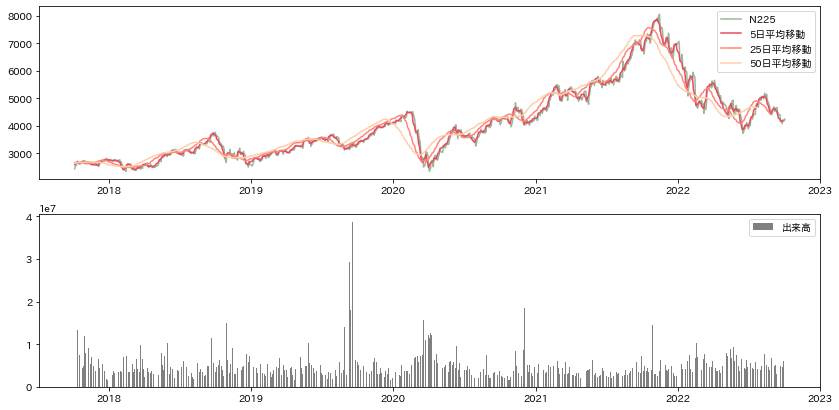

In [231]:
#リクルートホールディングス(まとめて)
sample = data.DataReader('6098.JP', 'stooq')

sample_date = sample.index

#単純移動平均を追加
sample["5日間移動平均"]=sample["Close"].rolling(5).mean().round(1)
sample["25日間移動平均"]=sample["Close"].rolling(25).mean().round(1)
sample["50日間移動平均"]=sample["Close"].rolling(50).mean().round(1)

#２つのグラフを可視化
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)

plt.plot(sample_date, sample['Close'], label = 'N225', color="#99b898")
plt.plot(sample_date, sample["5日間移動平均"], label="5日平均移動", color="#e84a5f")
plt.plot(sample_date, sample["25日間移動平均"], label="25日平均移動", color="#ff847c")
plt.plot(sample_date, sample["50日間移動平均"], label="50日平均移動", color="#feceab")
plt.legend()

plt.subplot(2,1,2)
plt.bar(sample_date,sample["Volume"], label="出来高", color="gray")

plt.legend()

In [134]:
start = '2018-09-01'
end = '2022-09-01'
company_code = '6502.JP'

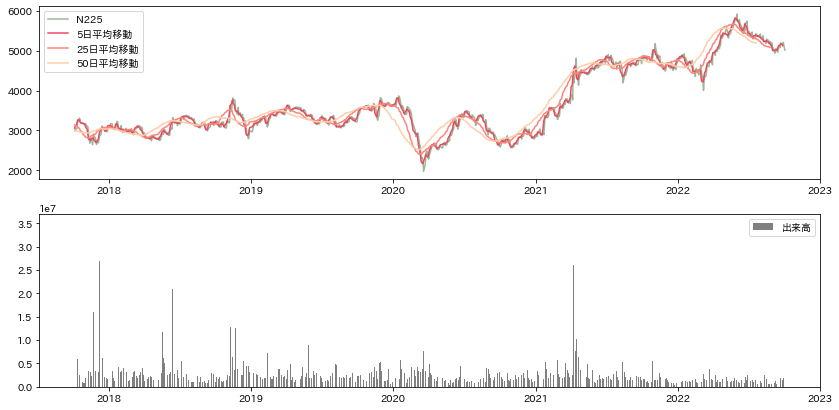

In [227]:
#ファーストリテイリング
from pandas_datareader import data

sample = data.DataReader(company_code, 'stooq')
sample[(sample.index >= start) & (sample.index <= end)]

sample_date = sample.index

#単純移動平均を追加
sample["5日間移動平均"]=sample["Close"].rolling(5).mean().round(1)
sample["25日間移動平均"]=sample["Close"].rolling(25).mean().round(1)
sample["50日間移動平均"]=sample["Close"].rolling(50).mean().round(1)

#２つのグラフを可視化
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)

plt.plot(sample_date, sample['Close'], label = 'N225', color="#99b898")
plt.plot(sample_date, sample["5日間移動平均"], label="5日平均移動", color="#e84a5f")
plt.plot(sample_date, sample["25日間移動平均"], label="25日平均移動", color="#ff847c")
plt.plot(sample_date, sample["50日間移動平均"], label="50日平均移動", color="#feceab")
plt.legend()

plt.subplot(2,1,2)
plt.bar(sample_date,sample["Volume"], label="出来高", color="gray")

plt.legend()

In [226]:
#株価の取得から可視化までを関数にする
from pandas_datareader import data

def company_stock(start, end, company_code):
    sample = data.DataReader(company_code, 'stooq')
    sample[(sample.index >= start) & (sample.index <= end)]
    
    sample_date = sample.index

    #単純移動平均を追加
    sample["5日間移動平均"]=sample["Close"].rolling(5).mean().round(1)
    sample["25日間移動平均"]=sample["Close"].rolling(25).mean().round(1)
    sample["50日間移動平均"]=sample["Close"].rolling(50).mean().round(1)

    #２つのグラフを可視化
    plt.figure(figsize=(14,7))
    plt.subplot(2,1,1)

    plt.plot(sample_date, sample['Close'], label = 'N225', color="#99b898")
    plt.plot(sample_date, sample["5日間移動平均"], label="5日平均移動", color="#e84a5f")
    plt.plot(sample_date, sample["25日間移動平均"], label="25日平均移動", color="#ff847c")
    plt.plot(sample_date, sample["50日間移動平均"], label="50日平均移動", color="#feceab")
    plt.legend()

    plt.subplot(2,1,2)
    plt.bar(sample_date,sample["Volume"], label="出来高", color="gray")

    plt.legend()

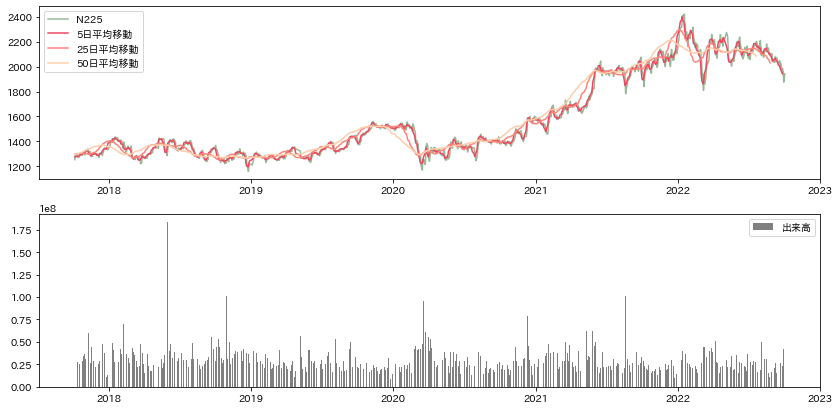

In [137]:
#関数を使ってTOYOTAのデータを取得、可視化
company_stock('2018-09-01', '2022-09-01', '7203.JP')

## 番外編＠3.：Bitcoinのテクニカル指標を可視化してみる

In [428]:
from pandas_datareader import data

start = '2018-09-01'
end = '2022-09-01'

sample = data.DataReader("BTC-JPY", "yahoo", start, end)

sample.head()

High          Low         Open       Close        Volume  \
Date                                                                          
2018-08-31  782851.8750  766338.5000  774180.4375  781312.125  499107063000   
2018-09-01  804039.0625  781364.3125  782114.8125  798594.625  456963871000   
2018-09-02  811146.5625  791812.3750  798187.1875  808217.375  481141780200   
2018-09-03  813169.5000  799672.1875  808918.6250  806374.875  454027503200   
2018-09-04  823643.2500  804918.5000  806701.4375  820530.625  476339914400   

             Adj Close  
Date                    
2018-08-31  781312.125  
2018-09-01  798594.625  
2018-09-02  808217.375  
2018-09-03  806374.875  
2018-09-04  820530.625

In [429]:
#今まで見てきたテクニカル指標のコピー
sample_date= sample.index

#単純移動平均を追加
sample["5日間移動平均"]=sample["Adj Close"].rolling(5).mean().round(1)
sample["25日間移動平均"]=sample["Adj Close"].rolling(25).mean().round(1)
sample["50日間移動平均"]=sample["Adj Close"].rolling(50).mean().round(1)

#MACD
sample['macd'], sample['macdsignal'], sample['macdhist'] = ta.MACD(sample['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)

#RSI
sample['RSI'] = ta.RSI(sample['Adj Close'], timeperiod=25)

#ボリンジャーバンド
sample['upper'], sample['middle'], sample['lower'] = ta.BBANDS(sample['Adj Close'], timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)

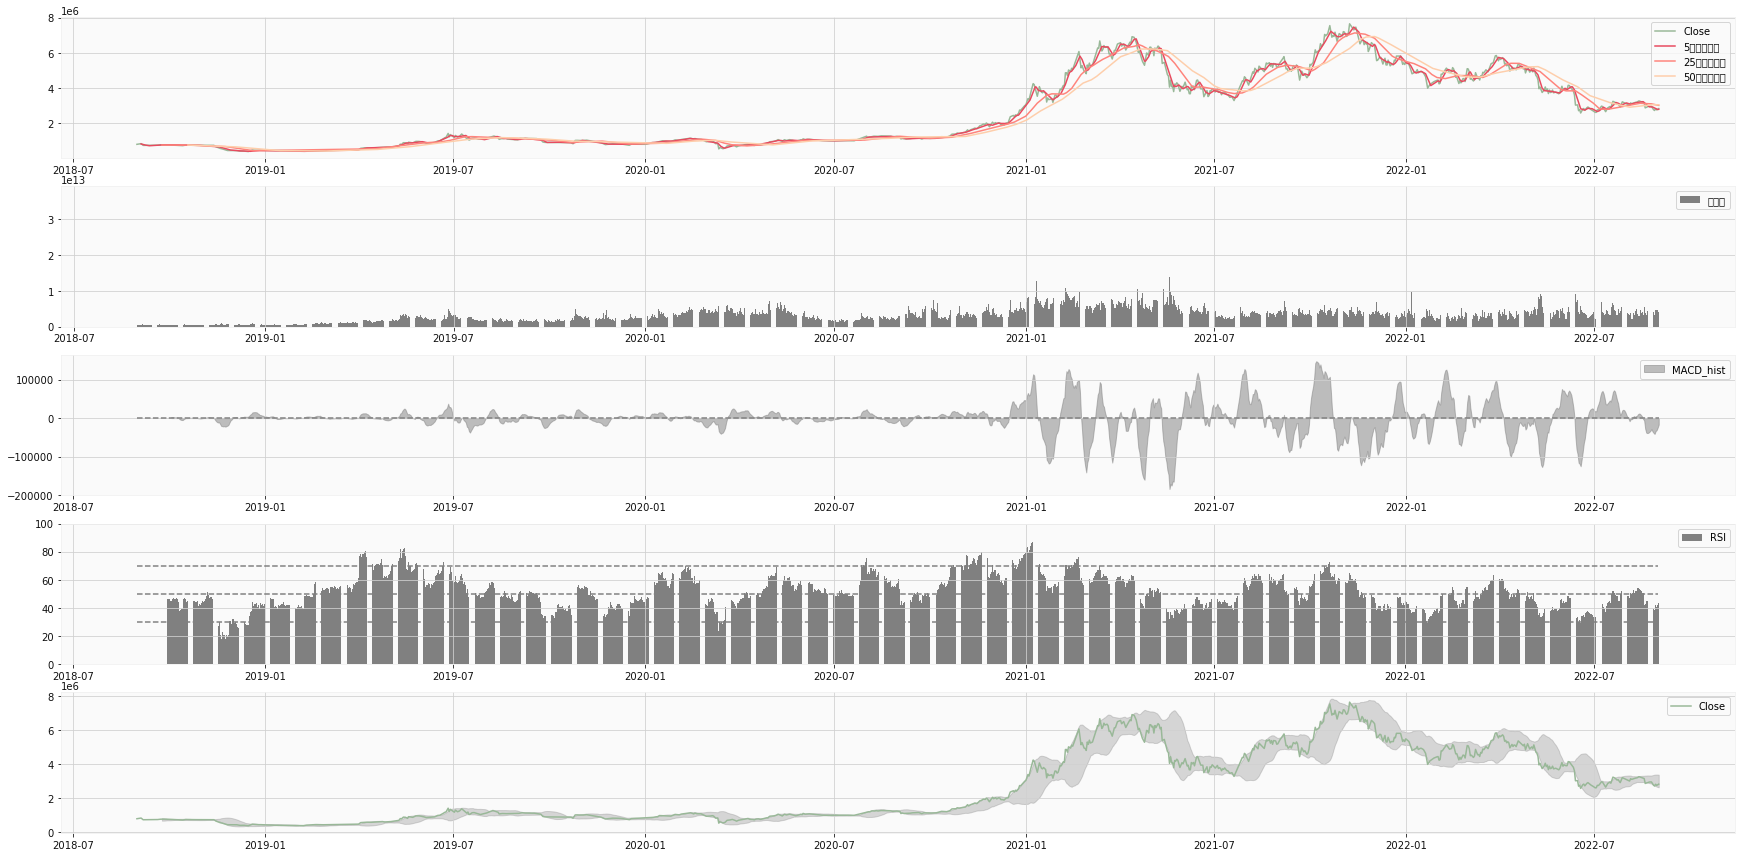

In [433]:
#可視化
plt.figure(figsize=(30,15))

#移動平均
plt.subplot(5,1,1)
plt.plot(sample_date, sample['Adj Close'], label= 'Close', color="#99b898")
plt.plot(sample_date, sample["5日間移動平均"], label="5日平均移動", color="#e84a5f")
plt.plot(sample_date, sample["25日間移動平均"], label="25日平均移動", color="#ff847c")
plt.plot(sample_date, sample["50日間移動平均"], label="50日平均移動", color="#feceab")
plt.legend()

#出来高
plt.subplot(5,1,2)
plt.bar(sample_date,sample["Volume"], label="出来高", color="gray")
plt.legend()

#MACD
plt.subplot(5,1,3)
plt.fill_between(sample_date, sample['macdhist'], color= 'gray', alpha= 0.5, label= "MACD_hist")
plt.hlines(0, sample.index.min(), sample.index.max(), 'gray', linestyles="dashed")
plt.legend()

#RSI
plt.subplot(5,1,4)
plt.bar(sample_date, sample["RSI"], label="RSI", color="gray")
plt.ylim(0,100)
plt.hlines([30,50,70], sample.index.min(), sample.index.max(), "gray", linestyles="dashed")
plt.legend()

#ボリンジャーバンド
plt.subplot(5,1,5)
plt.plot(sample_date, sample['Adj Close'], label = 'Close', color="#99b898")
plt.fill_between(sample_date, sample['upper'], sample['lower'], color= 'gray', alpha= 0.3)
plt.legend()

## メモ

・streamlitで可視化する際に参考にできそう  
https://data-analytics.fun/2022/01/29/understanding-streamlit-1/